# Click Log EDA

### Facets
* Click vs Nonclick
* QC Percentile
* Query Length Percentile

### Explanatory
* Ranking Features
* Doc Features (AvgRank, stdRank, ...)
* Doc Info

## Load libraries

In [4]:
import sys
sys.path.append("../../")
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style, rc, font_manager
style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
# font 설정
rc('font', family='AppleGothic')
# rc('font', family='NanumGothic')
# font = font_manager.FontProperties(fname="~/Library/Fonts/NanumGothic.ttf")
# print(font)
plt.rcParams['axes.unicode_minus'] = False
import random
import ast
import json
import os
import numpy as np
from scipy.stats import skew
from plotnine import *
import seaborn as sns
import datetime
import warnings
# warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')
today = datetime.datetime.today().strftime("%Y%m%d")
today

'20220503'

## Load data

In [5]:
SERVICE = "card"
PERIOD = "1w"
DATA_CREATED_AT = "20220503"
RANKING_DATA_DIR = f"../../rdataset/{SERVICE}"
CLICK_DATA = f"{DATA_CREATED_AT}.{SERVICE}.click.ranking.base.{PERIOD}.csv"
CLICK_FEATURE_DATA = f"{DATA_CREATED_AT}.{SERVICE}.click.ranking.base.{PERIOD}.features.csv"
print(f"SERVICE: {SERVICE}\nPERIOD: {PERIOD}\nDATA_CREATED_AT: {DATA_CREATED_AT}")
print(CLICK_DATA)
print(CLICK_FEATURE_DATA)

SERVICE: card
PERIOD: 1w
DATA_CREATED_AT: 20220503
20220503.card.click.ranking.base.1w.csv
20220503.card.click.ranking.base.1w.features.csv


In [6]:
df = pd.read_csv(os.path.join(RANKING_DATA_DIR, CLICK_FEATURE_DATA))
# 이상한 로그 제거하기
abnormal_idx_list = df.loc[(df["impressions"] == 0) & (df["clicks"] > 0)].index
print("imp=0, click>0 인 이상한 경우:", len(abnormal_idx_list))
df.drop(abnormal_idx_list, axis=0, inplace=True)
# shuffling
random.seed(1004)
ids = df["search_keyword"].unique()
random.shuffle(ids)
df = df.set_index("search_keyword").loc[ids].reset_index()
df

imp=0, click>0 인 이상한 경우: 142


search_keyword     docid  avgRank  stdevRank  impressions  clicks  \
0                 거울리폼  11076848   108.00       0.89            5       0   
1                 거울리폼     89777   142.00       2.28            5       0   
2                 거울리폼   9839742   257.00       0.00            1       0   
3                 거울리폼   8059638   201.00       0.00            1       0   
4                 거울리폼   8975277   148.40       2.58            5       0   
...                ...       ...      ...        ...          ...     ...   
1278084        오브제 냉장고  12234858    91.33       0.47            3       0   
1278085        오브제 냉장고  12882515    55.00       1.00            6       0   
1278086        오브제 냉장고  11844410     6.91      10.42           11       0   
1278087        오브제 냉장고  12999404   298.00       0.00            2       0   
1278088        오브제 냉장고  13034715   299.00       0.00            2       0   

         uimpressions  uclicks  scrapCnt  qc  ...  \
0                   4        0         0  58  ...   
1                   4        0         0  58  ...   
2                   1        0         0  58  ...   
3                   1        0         0  58  ...   
4                   4        0         0  58  ...   
...               ...      ...       ...  ..  ...   
1278084             3        0         0  43  ...   
1278085             5        0         0  43  ...   
1278086             7        0         0  43  ...   
1278087             1        0         0  43  ...   
1278088             1        0         0  43  ...   

         f__click_keywords.proximity  f__reply_count  f__follower_count  \
0                                0.0        0.000000                0.0   
1                                0.0        1.098612                0.0   
2                                0.0        0.000000                0.0   
3                                0.0        0.000000                0.0   
4                                0.0        0.000000                0.0   
...                              ...             ...                ...   
1278084                          0.0        0.000000                0.0   
1278085                          0.0        0.000000                0.0   
1278086                          0.0        0.000000                0.0   
1278087                          0.0        0.000000                0.0   
1278088                          0.0        0.000000                0.0   

         f__praise_count  f__scrap_count  f__view_count  f__user_card_count  \
0               1.386294        0.000000       4.962845                 0.0   
1               2.995732        4.304065       8.154500                 0.0   
2               1.791759        1.098612       0.000000                 0.0   
3               0.000000        3.737670       6.066108                 0.0   
4               1.945910        2.639057       6.208590                 0.0   
...                  ...             ...            ...                 ...   
1278084         0.000000        0.000000       4.234107                 0.0   
1278085         0.000000        0.000000       0.000000                 0.0   
1278086         0.693147        2.079442       5.505331                 0.0   
1278087         0.693147        2.302585       5.713733                 0.0   
1278088         0.000000        2.708050       5.384495                 0.0   

         f__created_at  f__has_tag  f__is_project  
0         1.444898e-04         0.0            0.0  
1         7.103098e-27         0.0            1.0  
2         1.498858e-05         1.0            0.0  
3         5.561574e-07         1.0            1.0  
4         2.962293e-06         1.0            0.0  
...                ...         ...            ...  
1278084   1.168042e-03         0.0            0.0  
1278085   4.095593e-03         1.0            0.0  
1278086   5.406574e-04         1.0            0.0  
1278087   5.031268e-03         1.0            0.0  
1278088   5.290491e-03  

In [5]:
df.columns

Index(['search_keyword', 'docid', 'avgRank', 'stdevRank', 'impressions',
       'clicks', 'uimpressions', 'uclicks', 'scrapCnt', 'qc', 'cc', 'uqc',
       'ucc', 'f__description.bm25', 'f__keyword_list.korean.bm25',
       'f__nickname.bm25', 'f__company.bm25', 'f__prod_name.bm25',
       'f__prod_brand_name.bm25', 'f__prod_categories.bm25',
       'f__decode_style.bm25', 'f__decode_area.bm25',
       'f__decode_residence.bm25', 'f__reinforcement.bm25',
       'f__click_keywords.bm25', 'f__desc.prod.keyword.bm25',
       'f__desc.prod.bm25', 'f__desc.keyword.bm25', 'f__description.proximity',
       'f__keyword_list.korean.proximity', 'f__nickname.proximity',
       'f__company.proximity', 'f__prod_name.proximity',
       'f__prod_brand_name.proximity', 'f__prod_categories.proximity',
       'f__decode_style.proximity', 'f__decode_area.proximity',
       'f__decode_residence.proximity', 'f__reinforcement.proximity',
       'f__click_keywords.proximity', 'f__reply_count', 'f__follower_c

* prod_name 과 prod_categories 간에 상관관계
* (자연스럽게) bm25, proximity는 높은 상관관계
* desc.prod, desc.keyword, desc.prod.keyword는 만족하는 문서가 없다. -> 피쳐기여도 0
* follower_count, user_card_count도 모두 함께 0이다.

/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


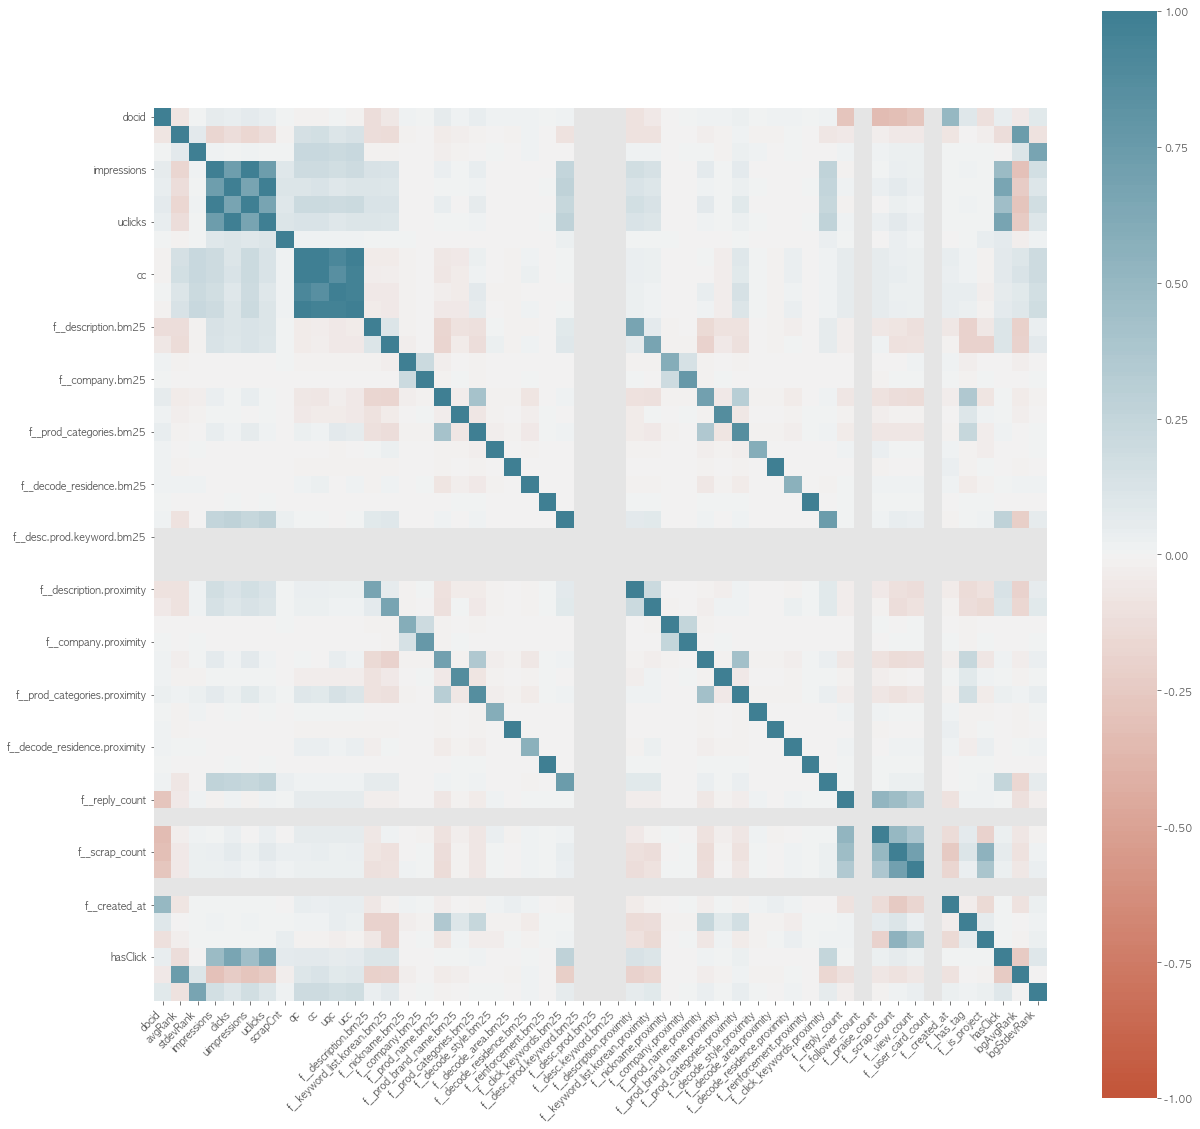

In [55]:
import seaborn as sns
ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.gcf().set_size_inches(20, 20)

In [49]:
df.corr().style.background_gradient(cmap='coolwarm')

/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered


## Facet 1: Click vs Nonclick

/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/plotnine/ggplot.py:365: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


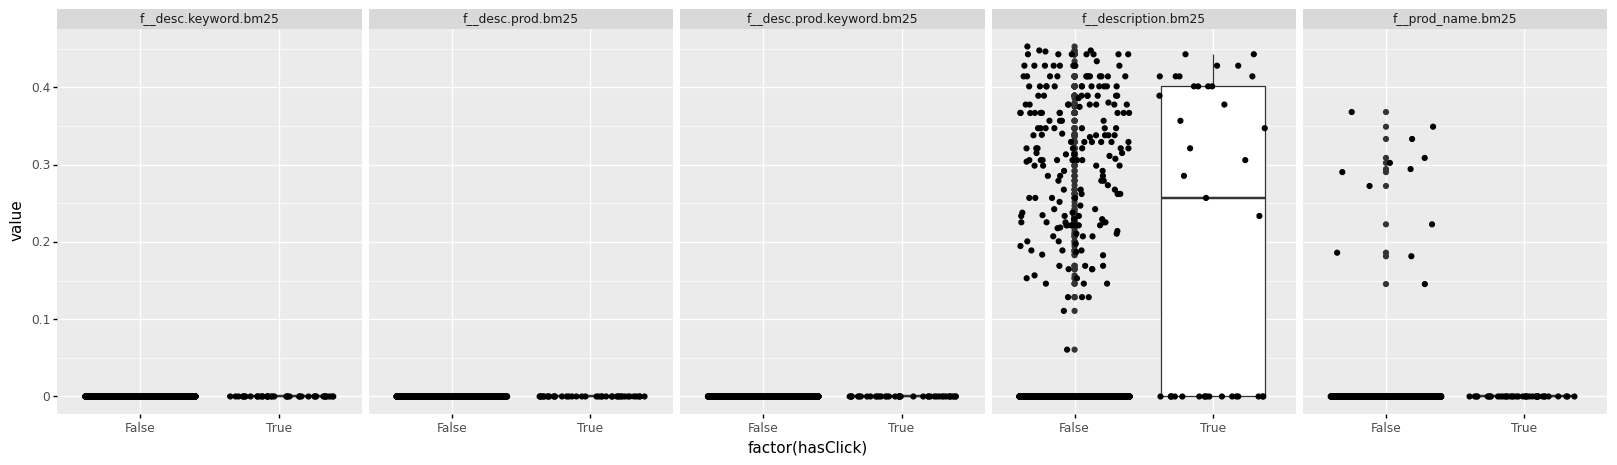

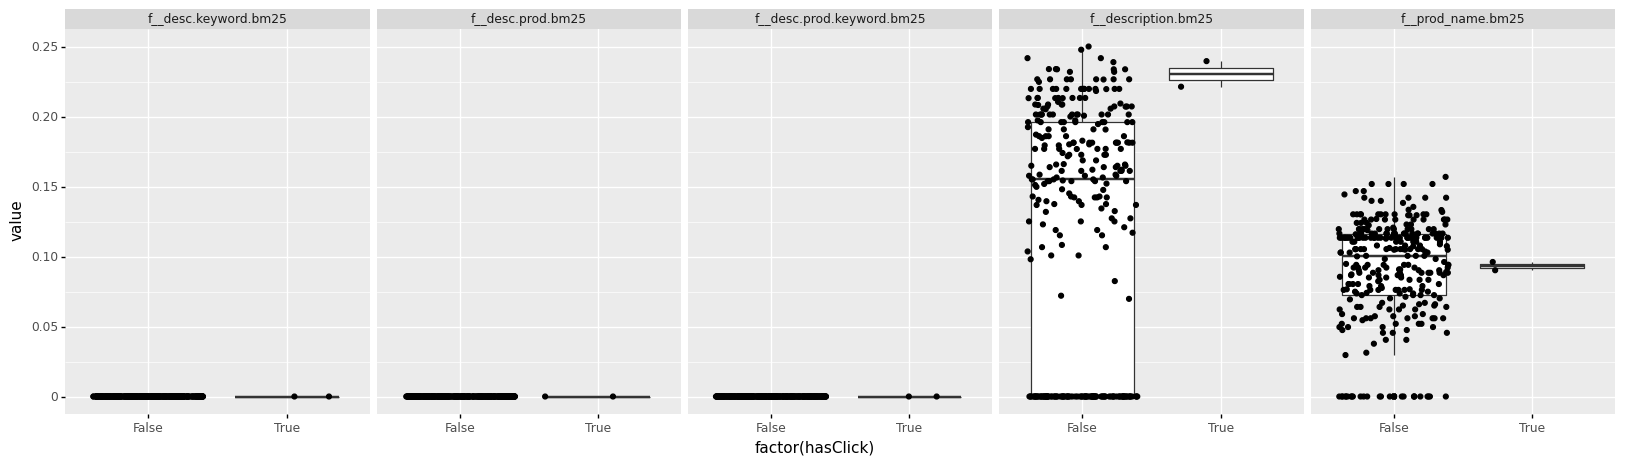

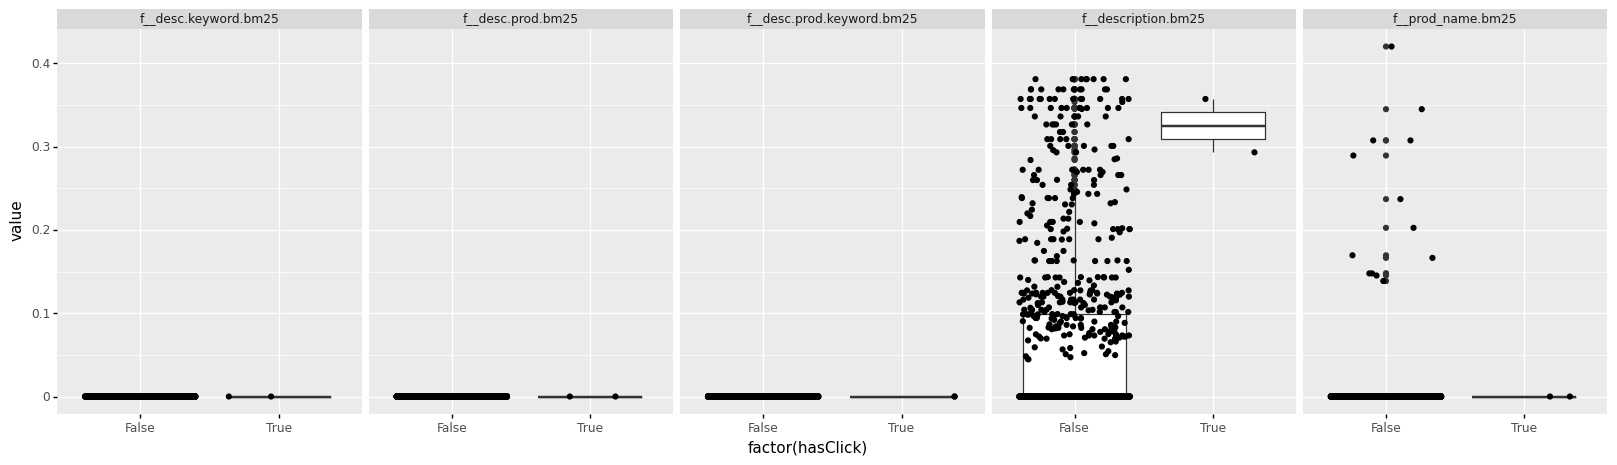

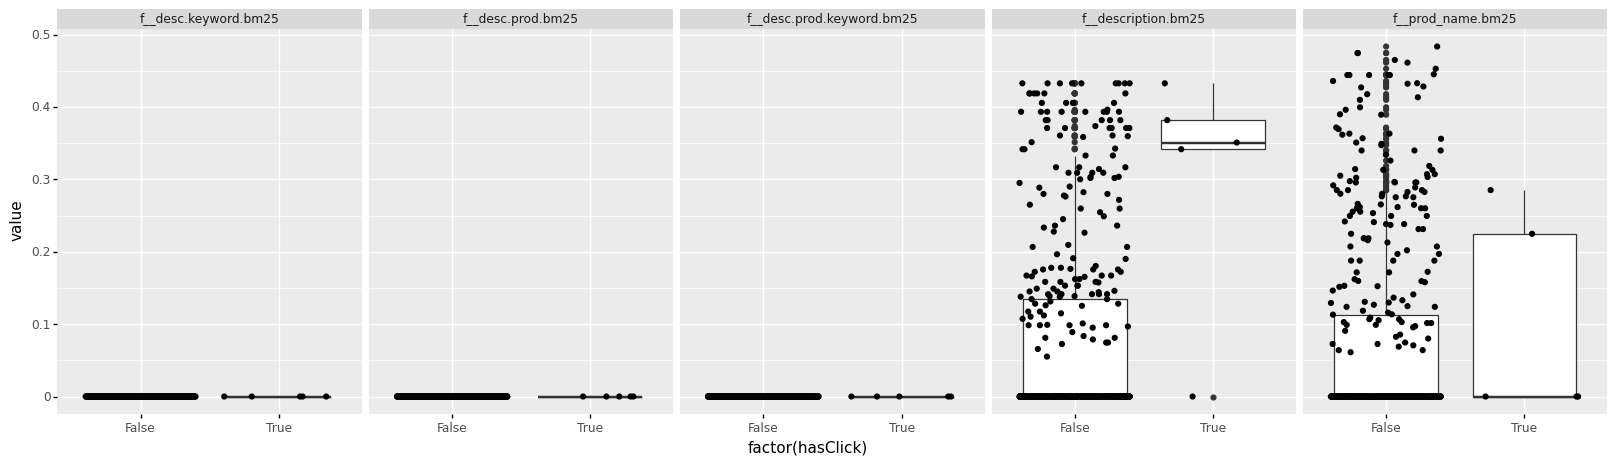

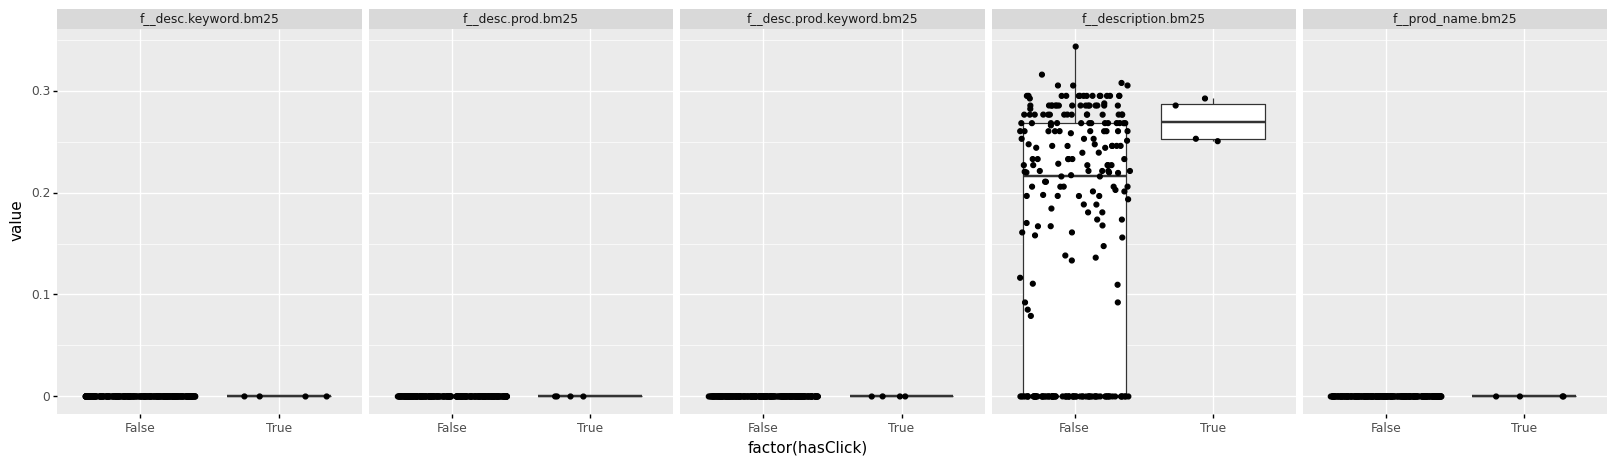

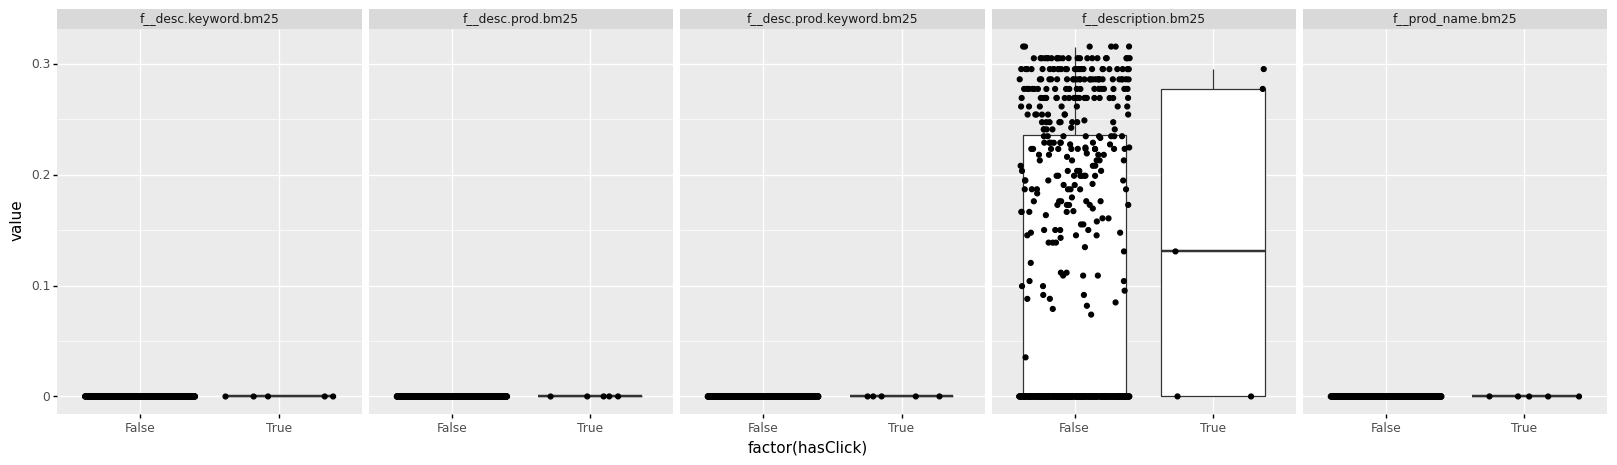

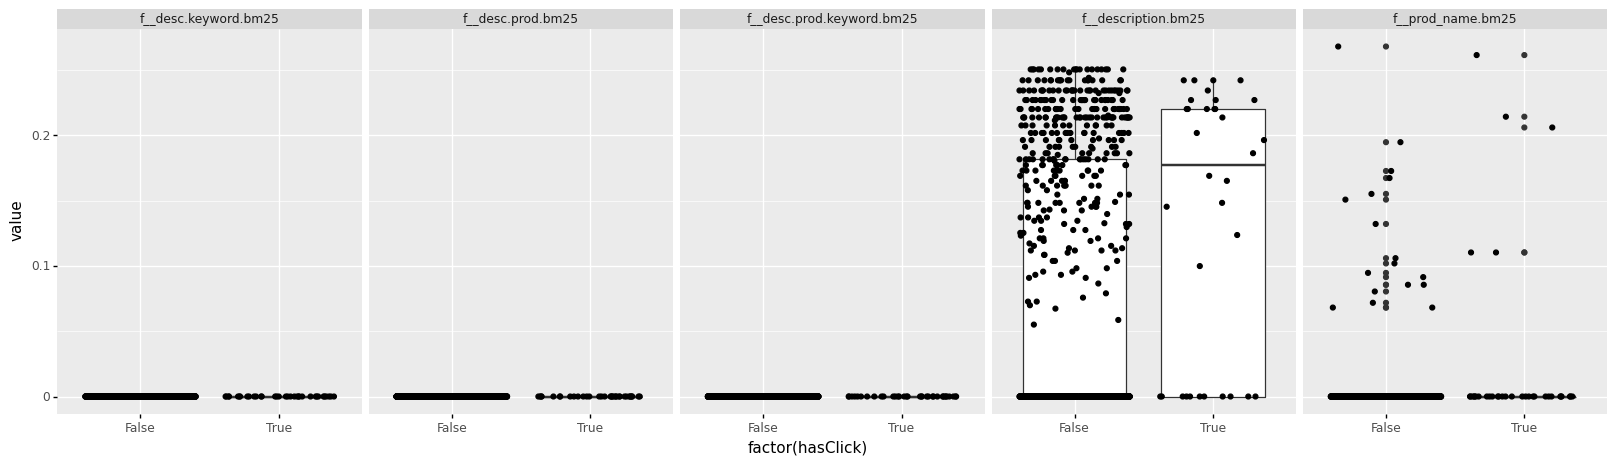

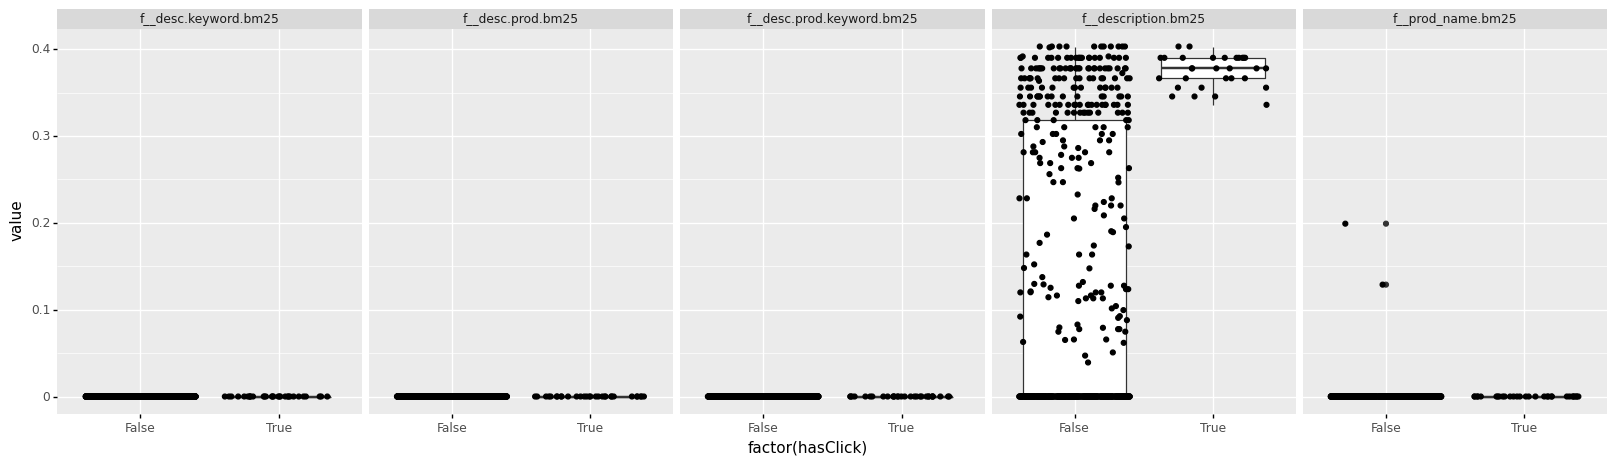

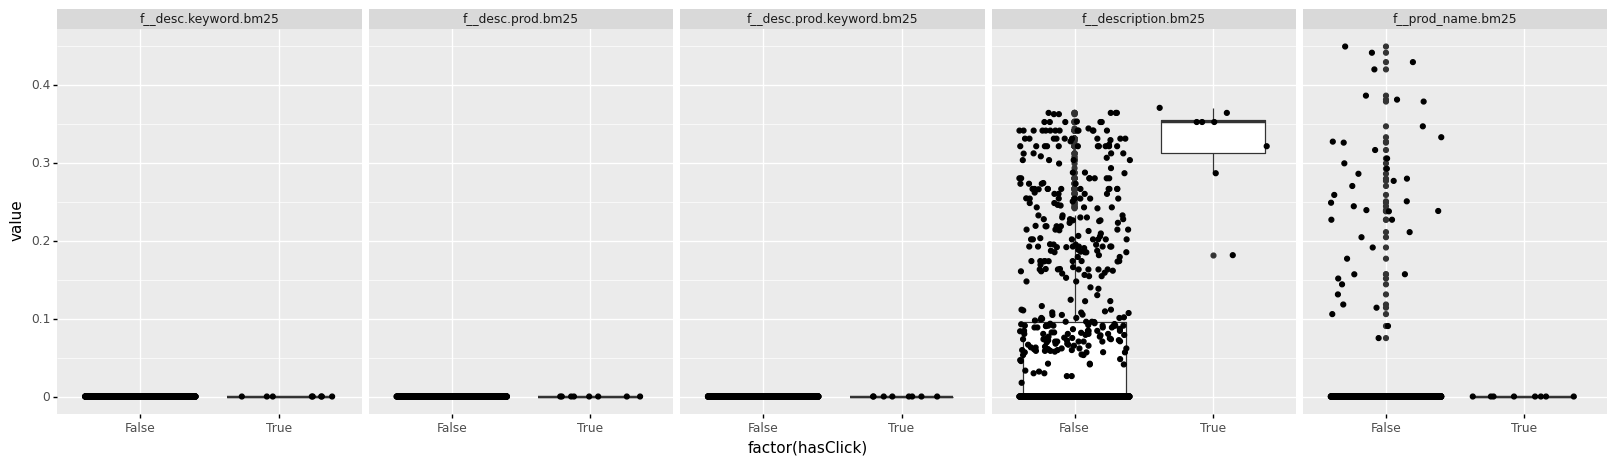

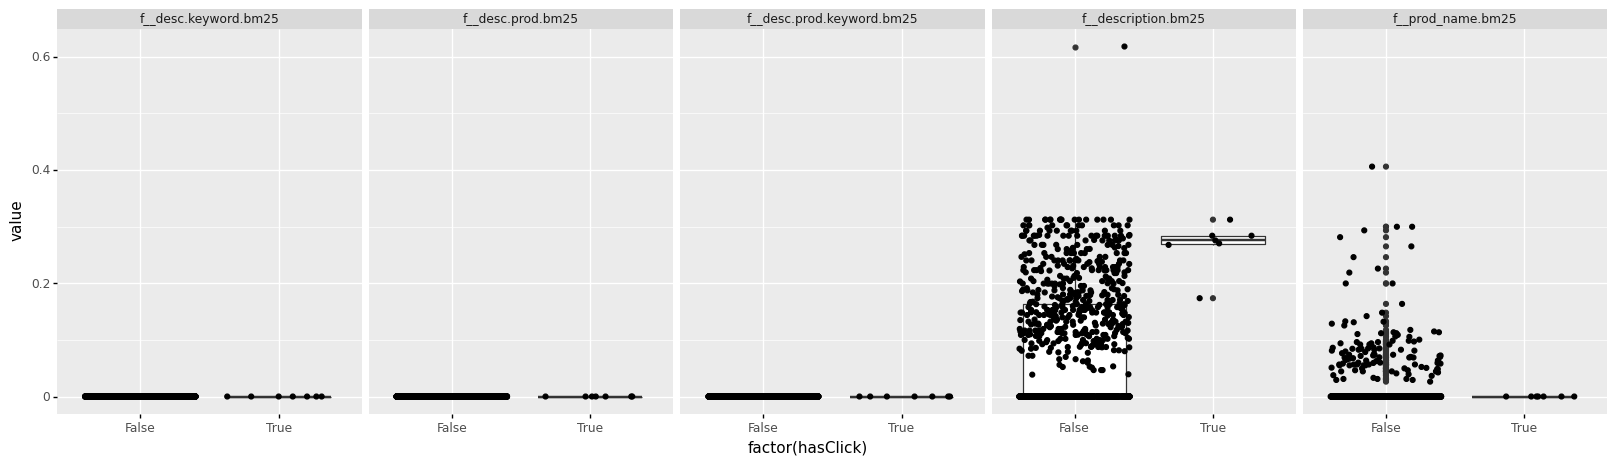

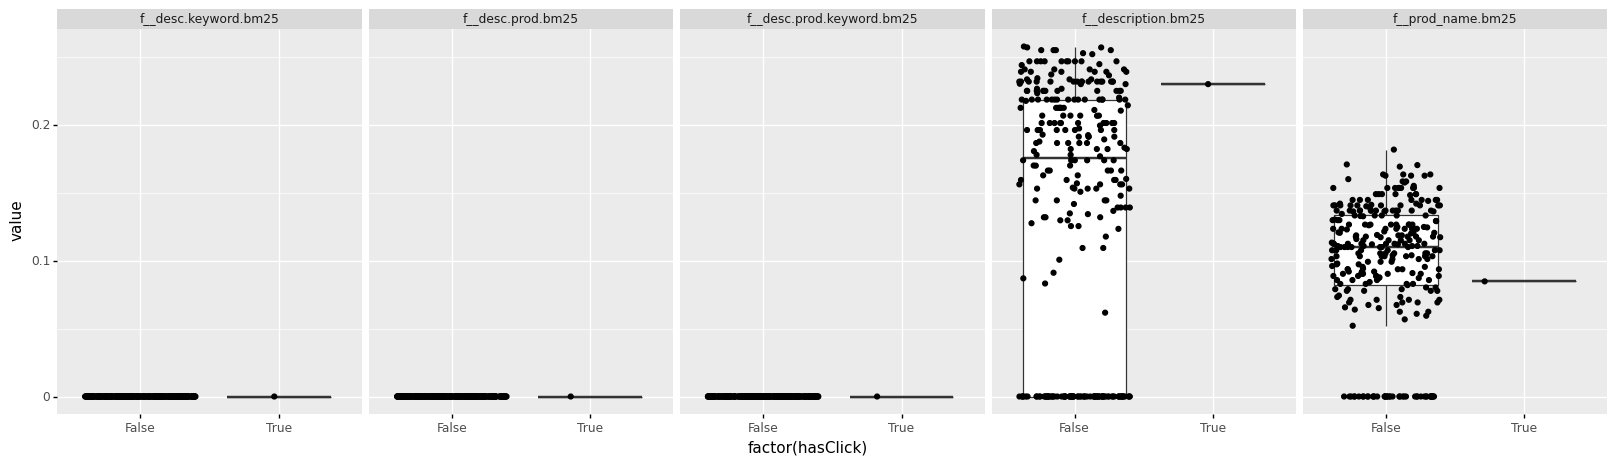

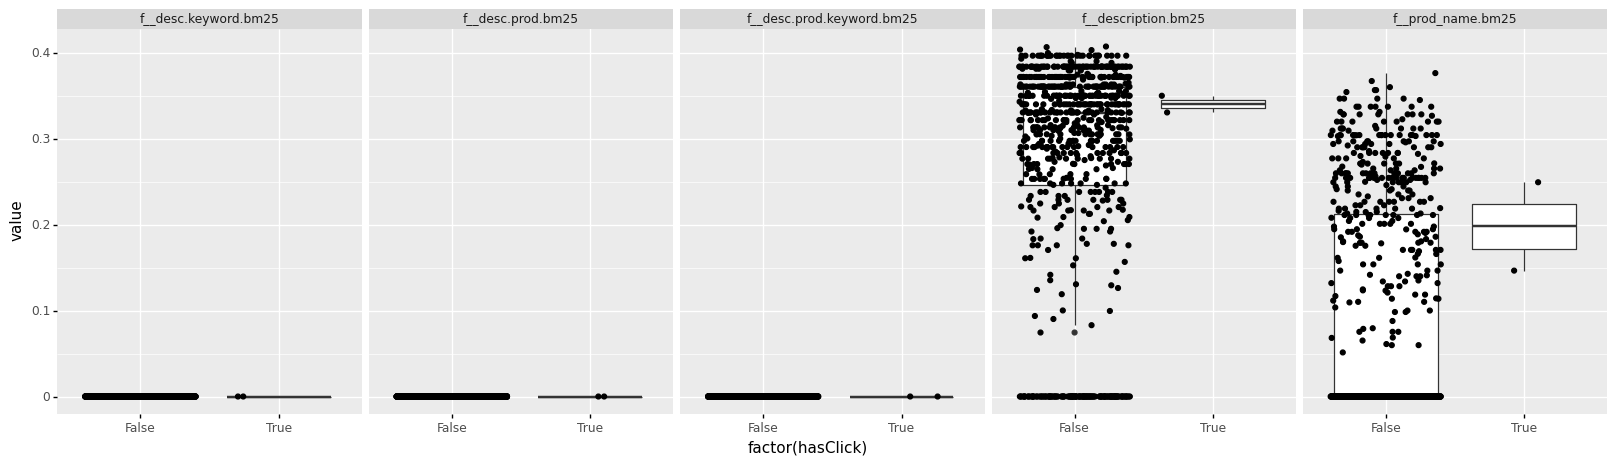

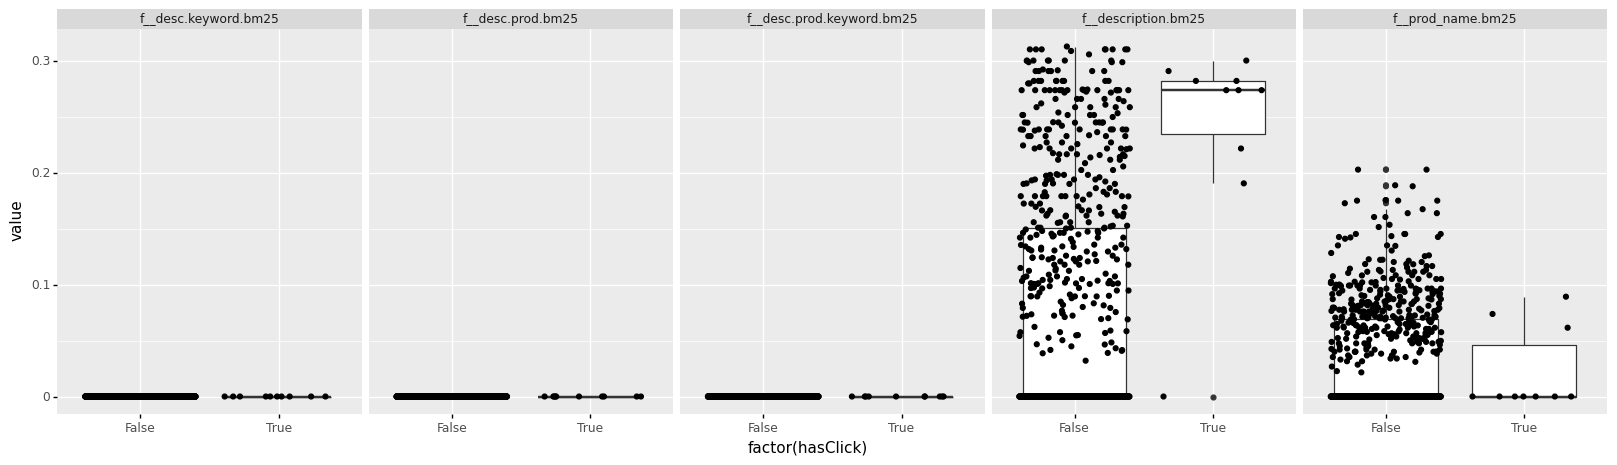

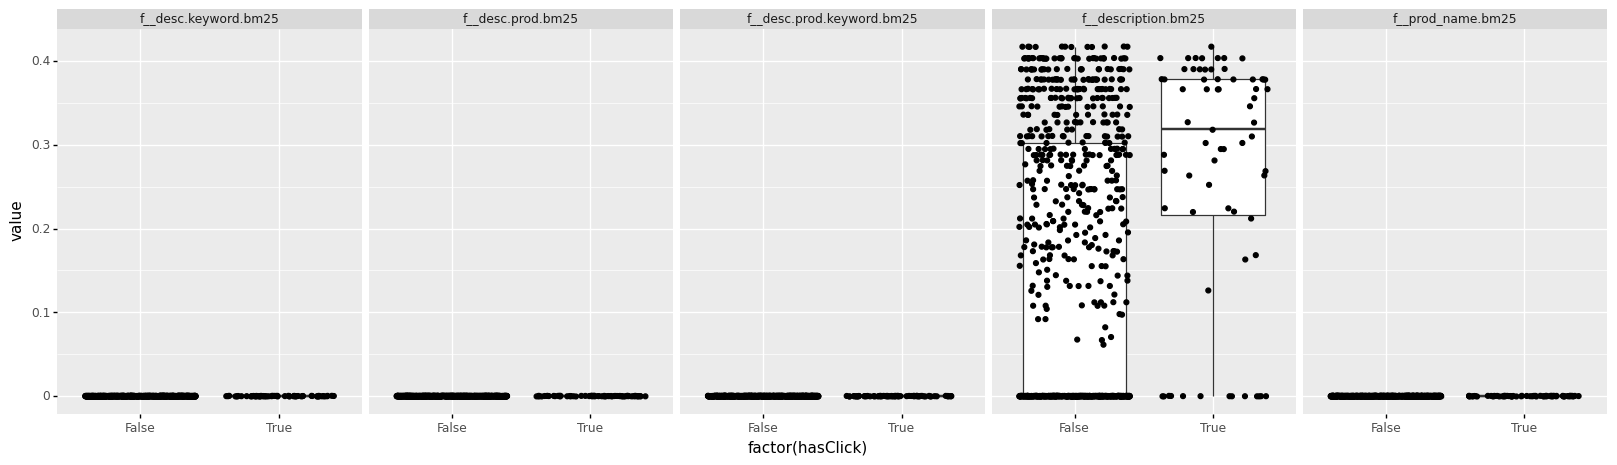

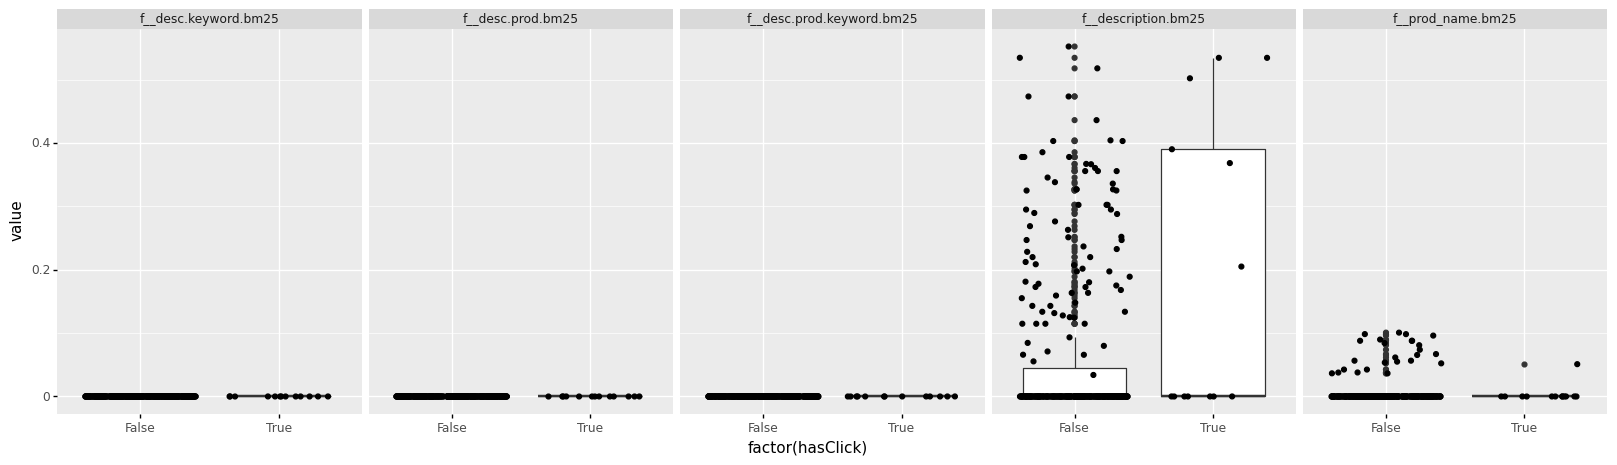

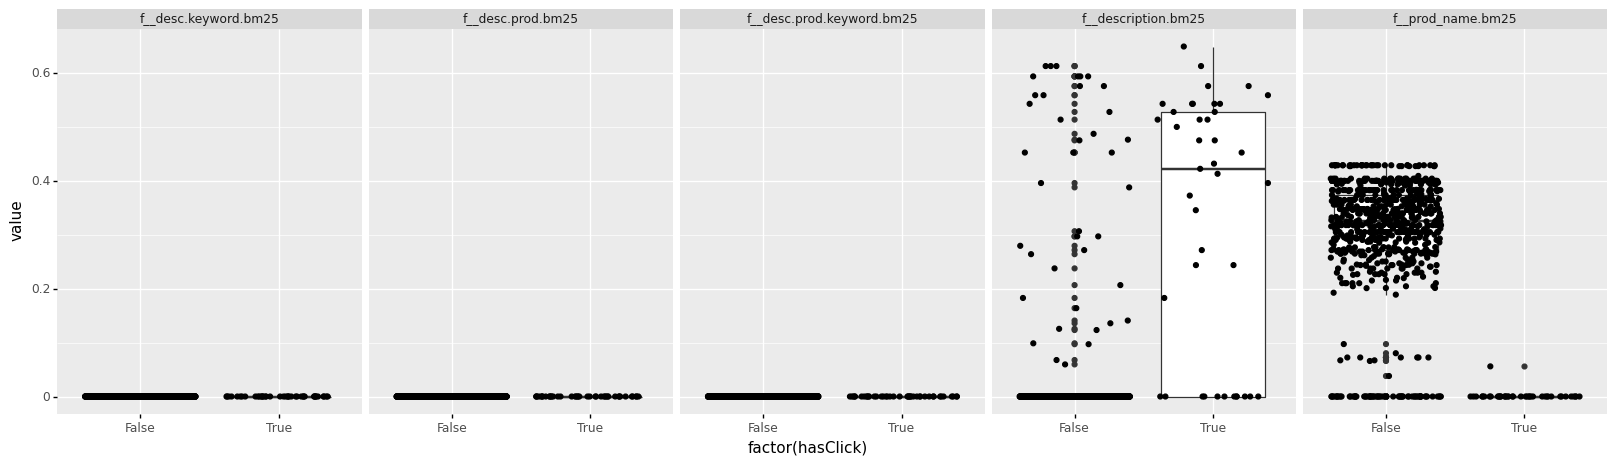

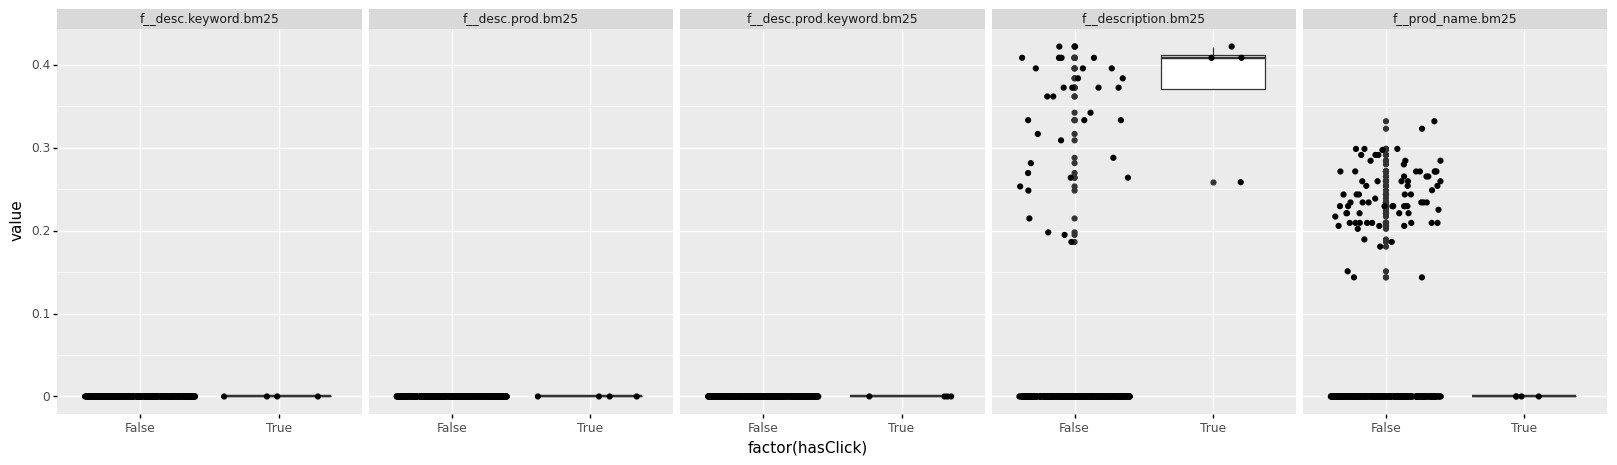

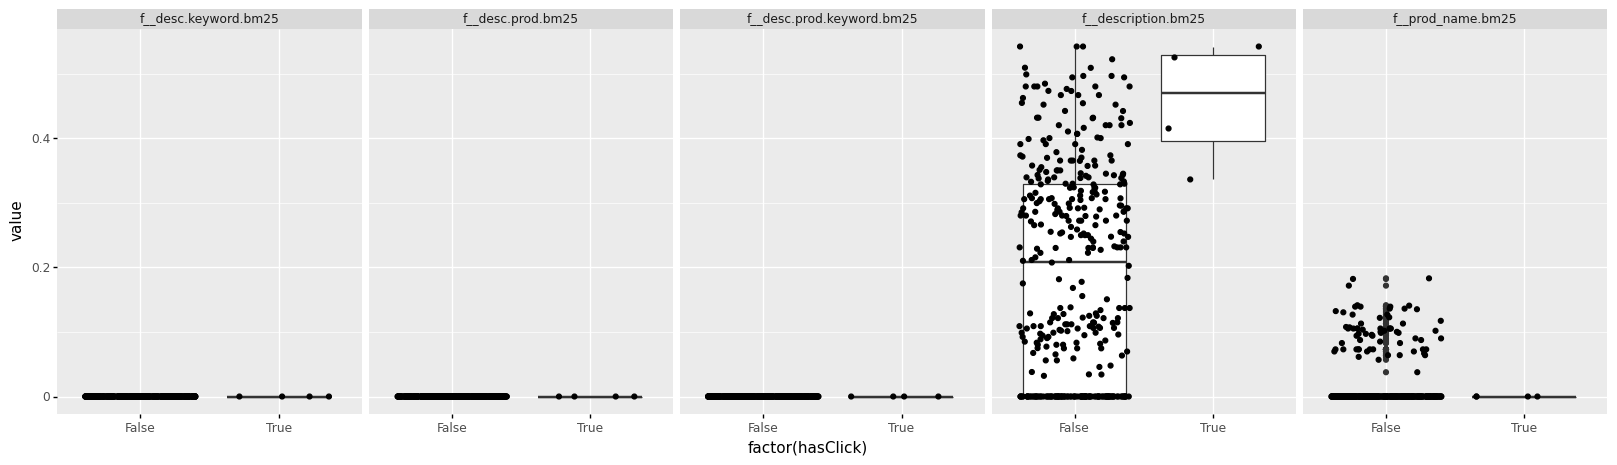

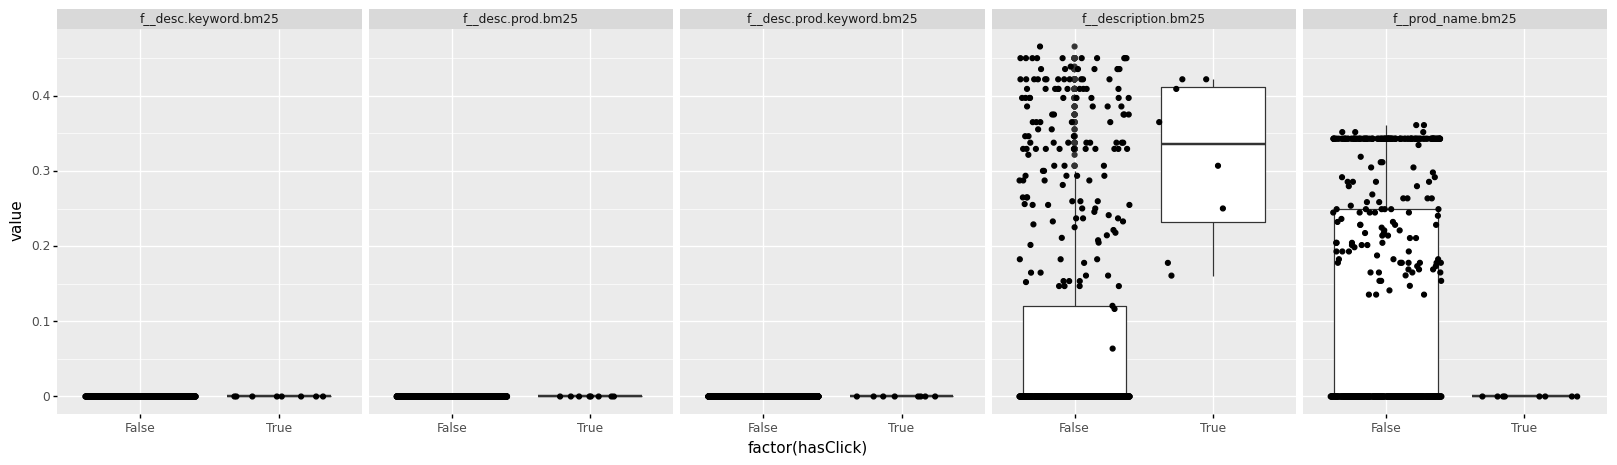

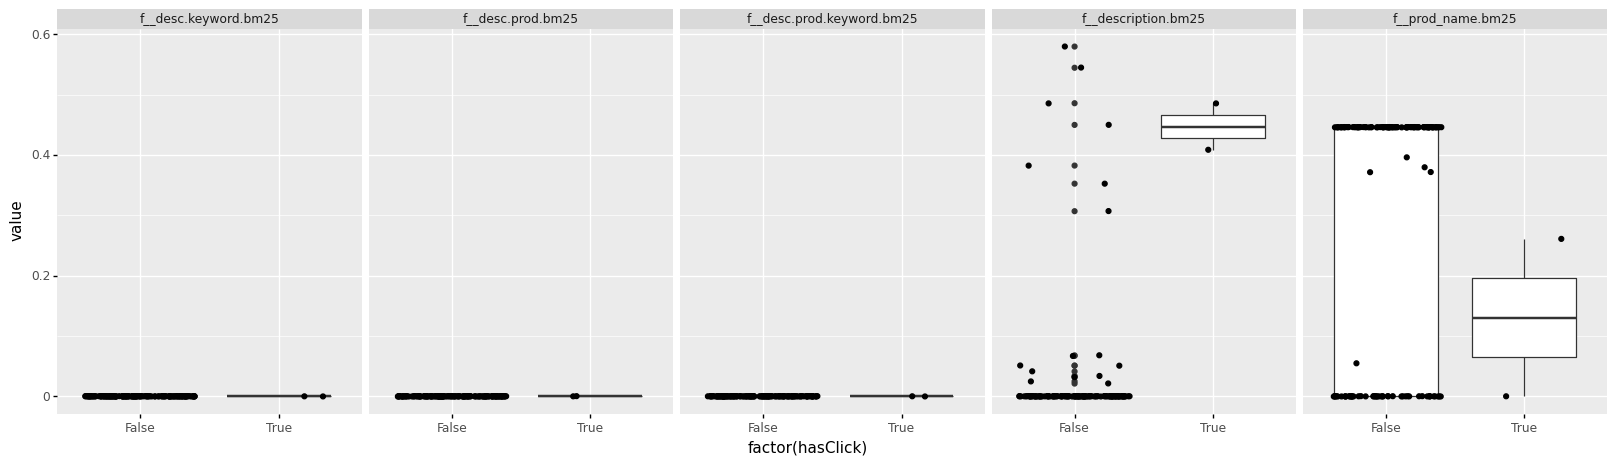

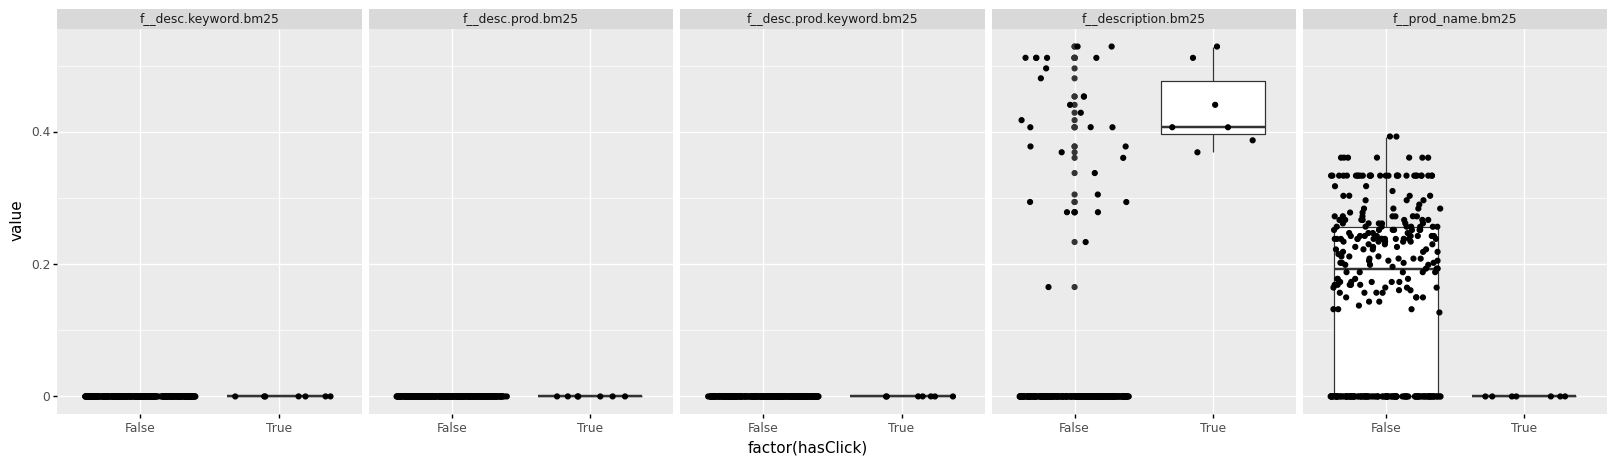

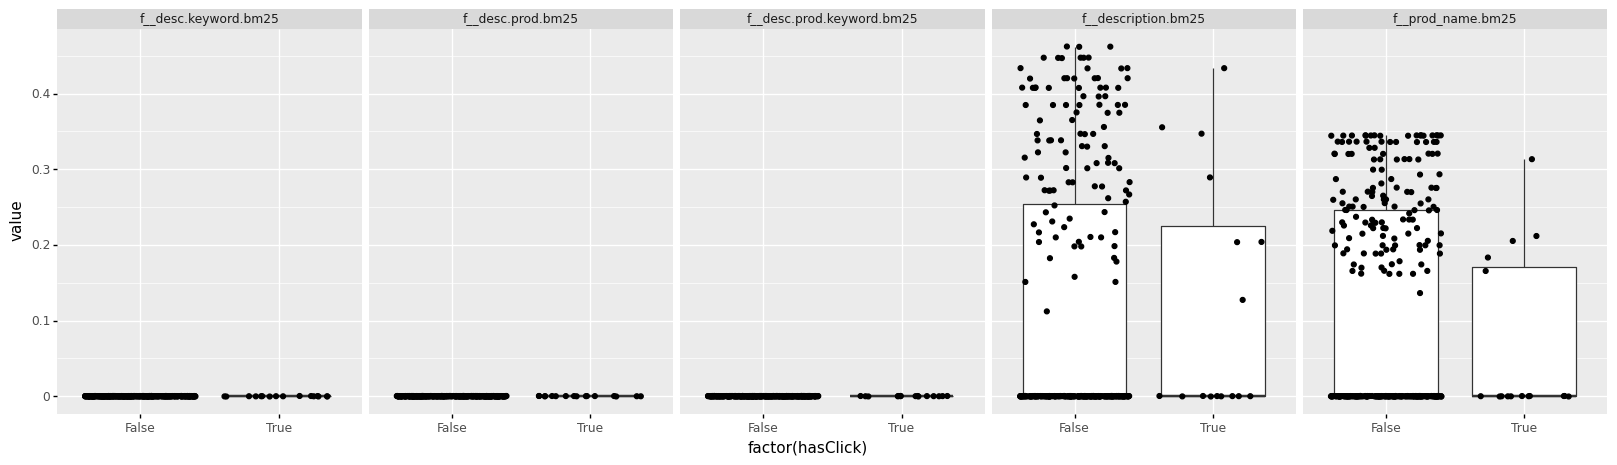

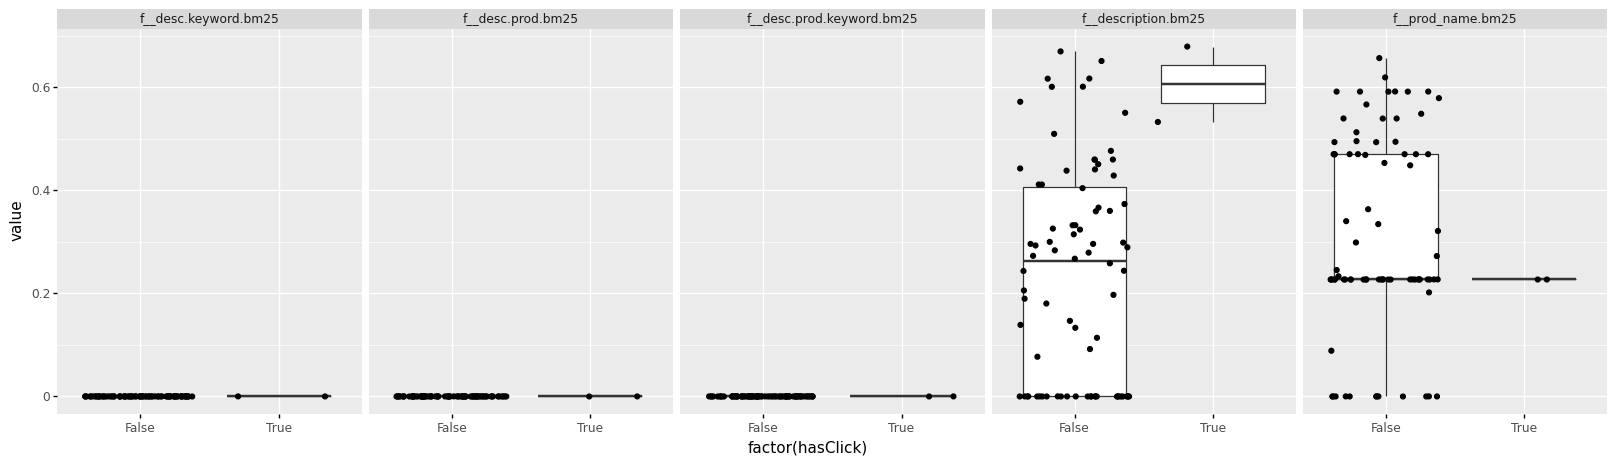

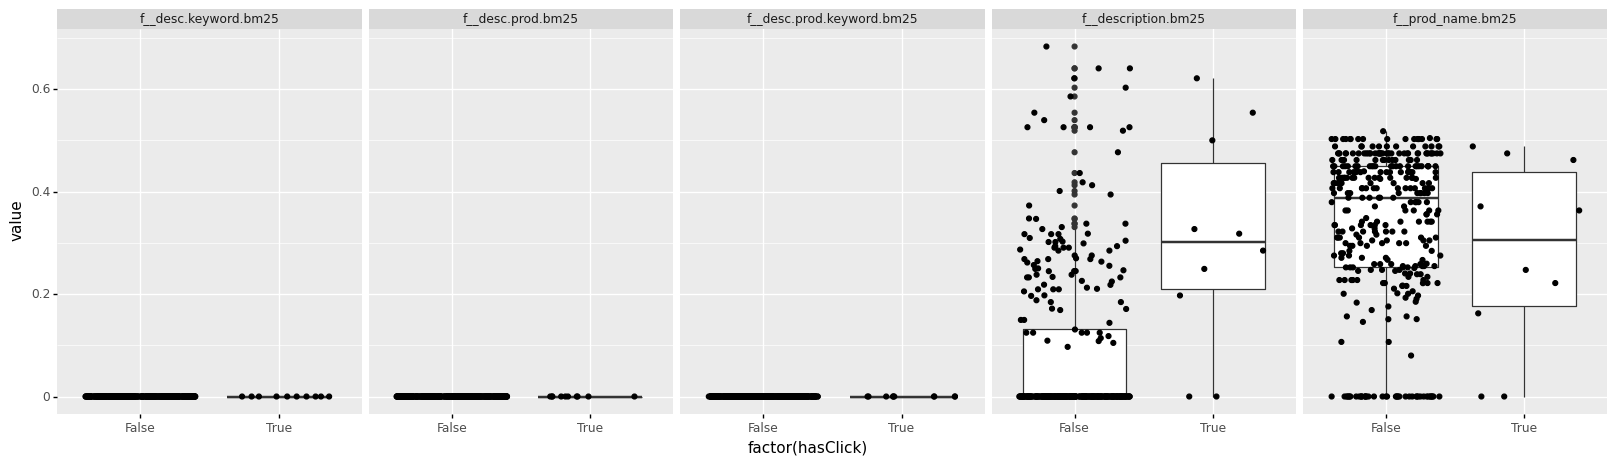

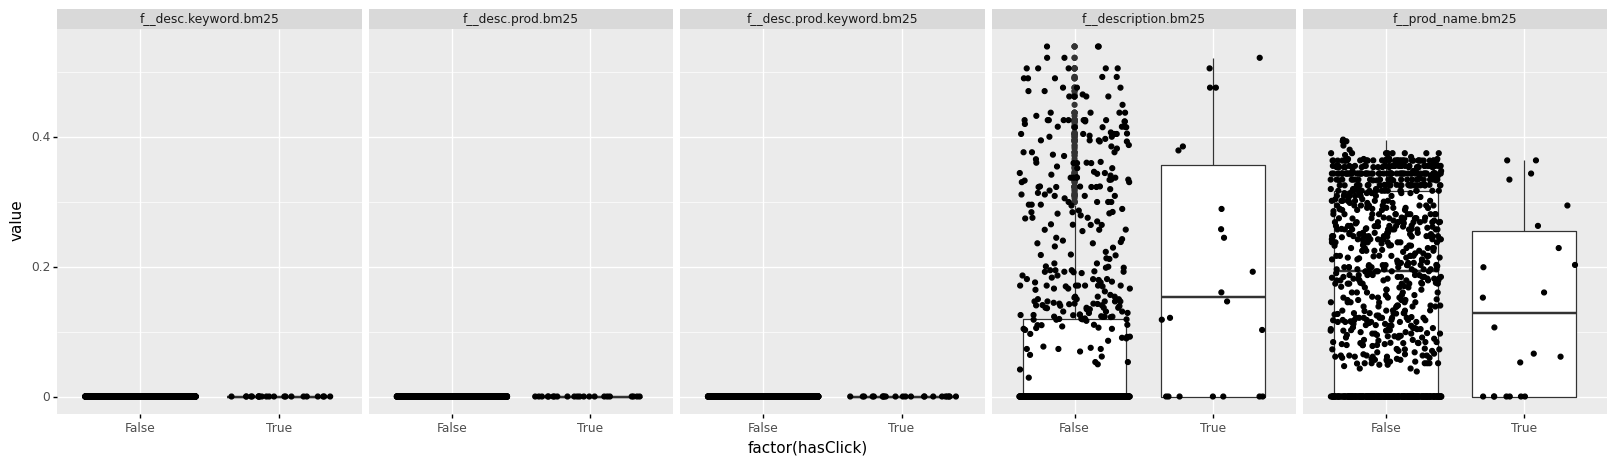

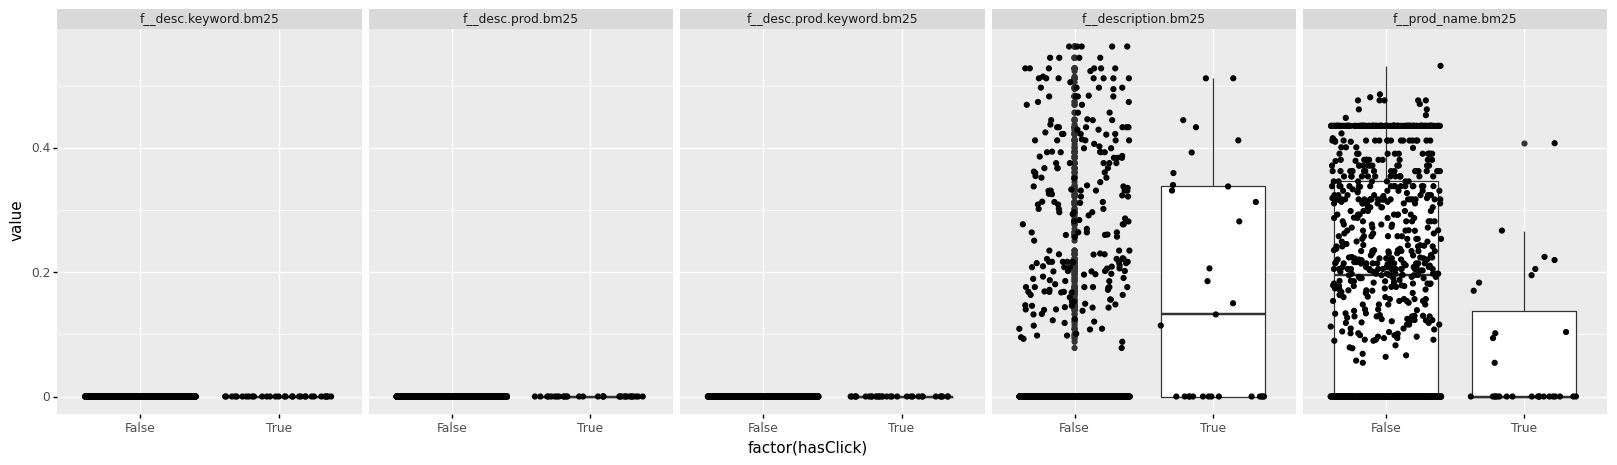

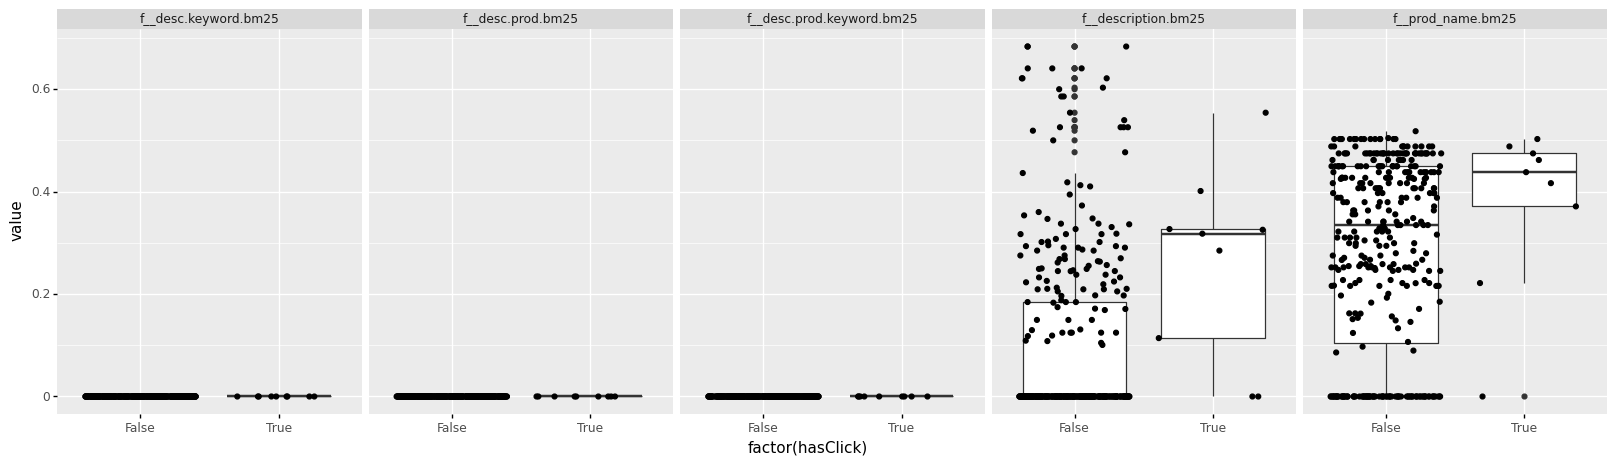

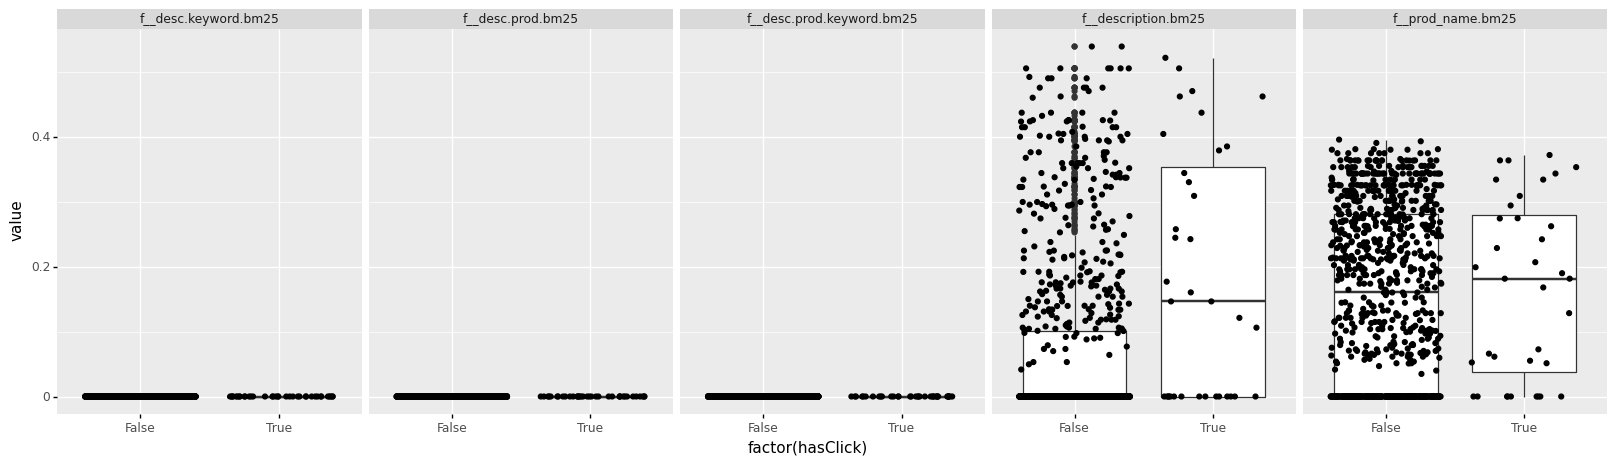

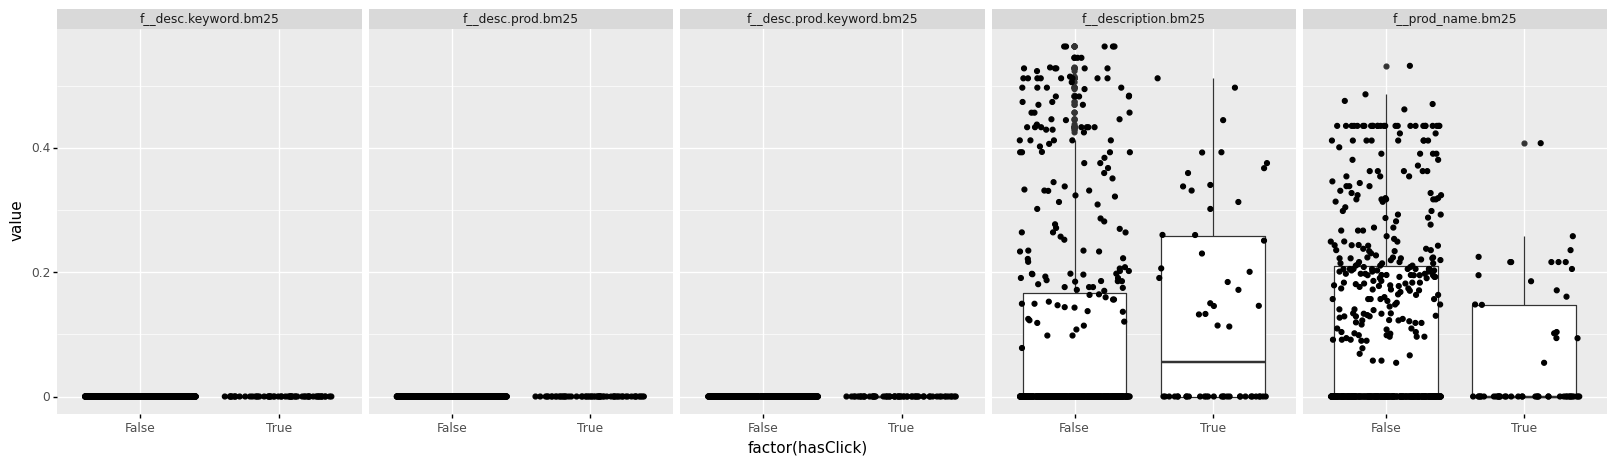

In [15]:
df["hasClick"] = df["uclicks"].apply(lambda x: True if x > 1 else False)

for i, (query, gdf) in enumerate(df.groupby(["search_keyword"])):
    if i == 30: break
    if len(gdf["hasClick"].unique()) == 1: continue

    # TODO: melt text type fields
    # TODO: + facet_grid(". ~ carat_c")
    gdf_reshape = pd.melt(
        frame=gdf,
        id_vars=["hasClick"],
        # value_vars=[x for x in gdf.columns if x.endswith(".bm25")],
        value_vars=["f__description.bm25", "f__prod_name.bm25", "f__desc.prod.bm25", "f__desc.keyword.bm25", "f__desc.prod.keyword.bm25"],
        # var_name=
        # value_nami=
    )
    # print(gdf_reshape.head())

    # draw plot
    (
        ggplot(gdf_reshape, aes("factor(hasClick)", "value"))
        + geom_boxplot()
        + geom_jitter()
        # + labs(title=query)
        # + geom_point()
        # + theme(text=element_text(fontproperties=font))
        # + ggtitle(query)
        + theme(figure_size=(20, 5))
        + facet_grid(".~variable")
    ).draw()

## Facet 2. QC

In [22]:
pd.qcut(df["qc"], q=3).value_counts()

(5.999, 74.0]      431078
(185.0, 8606.0]    424338
(74.0, 185.0]      422673
Name: qc, dtype: int64

/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/plotnine/geoms/geom_polygon.py:66: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/plotnine/geoms/geom_polygon.py:66: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/plotnine/geoms/geom_poly

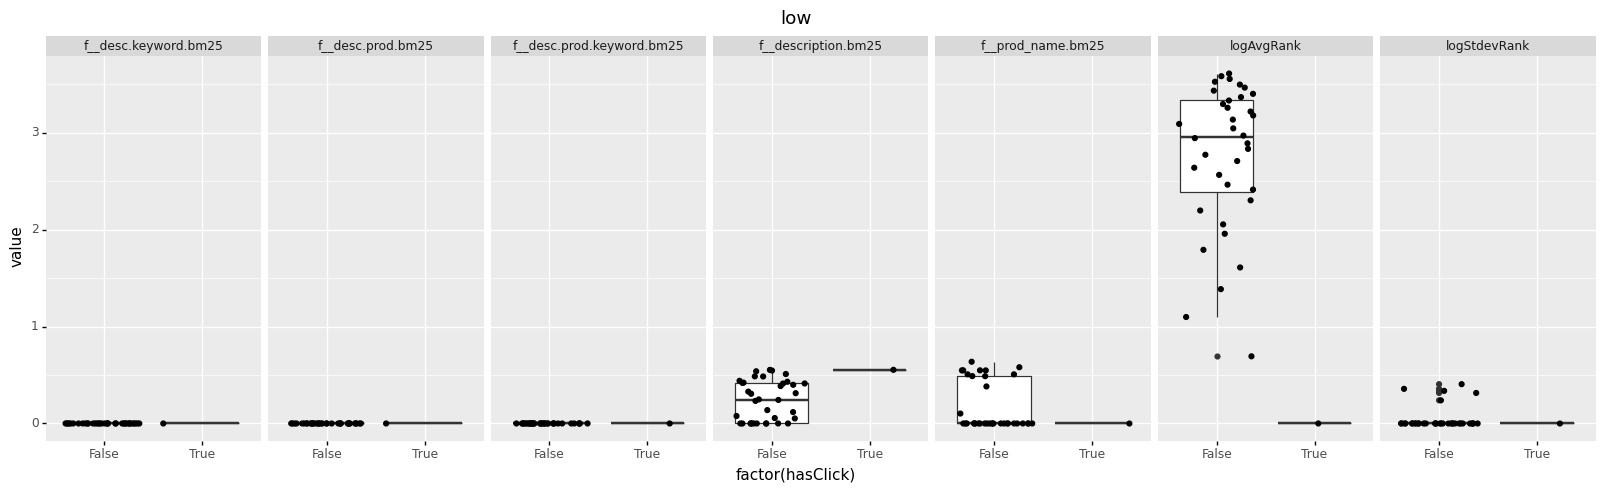

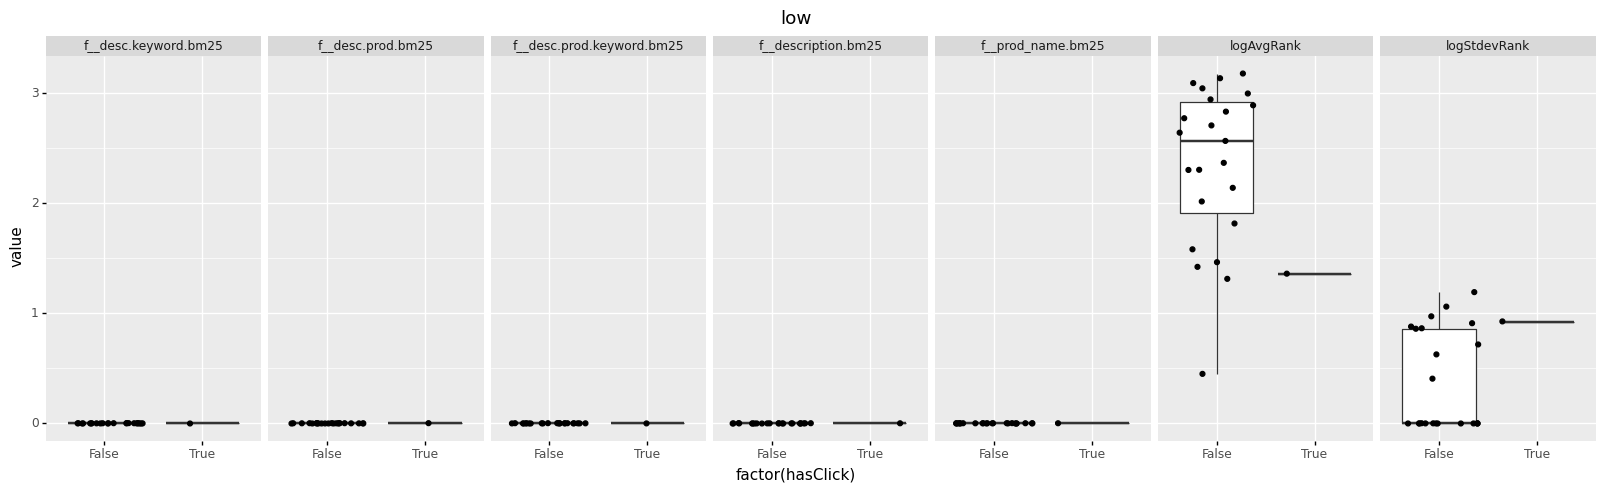

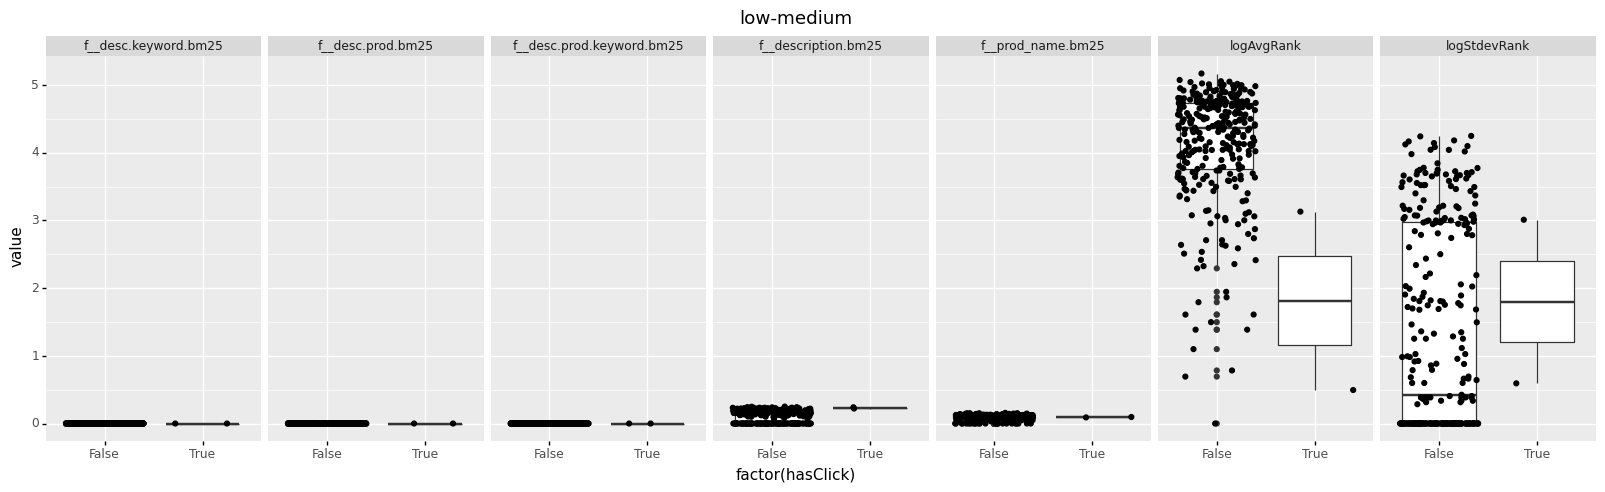

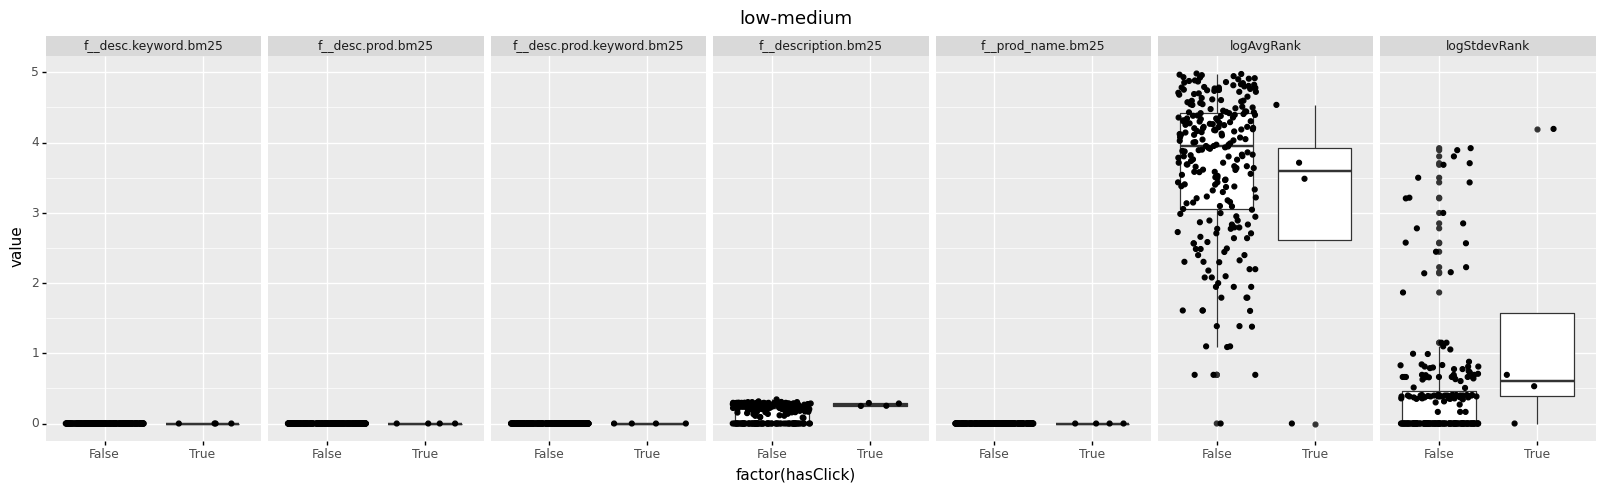

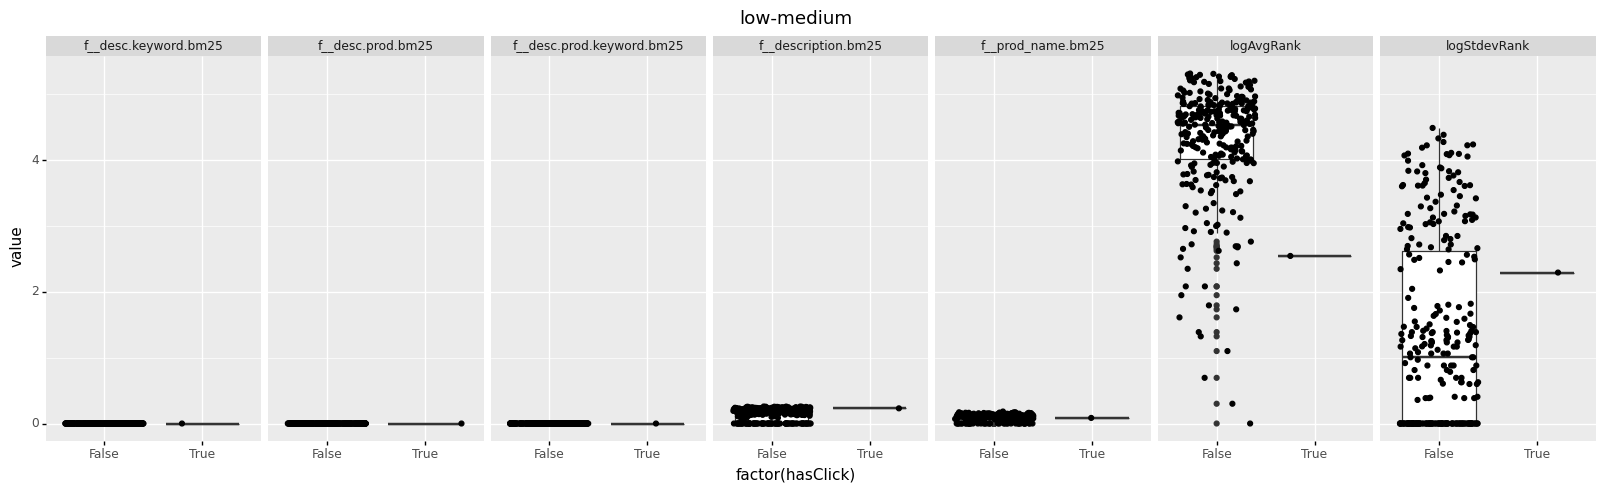

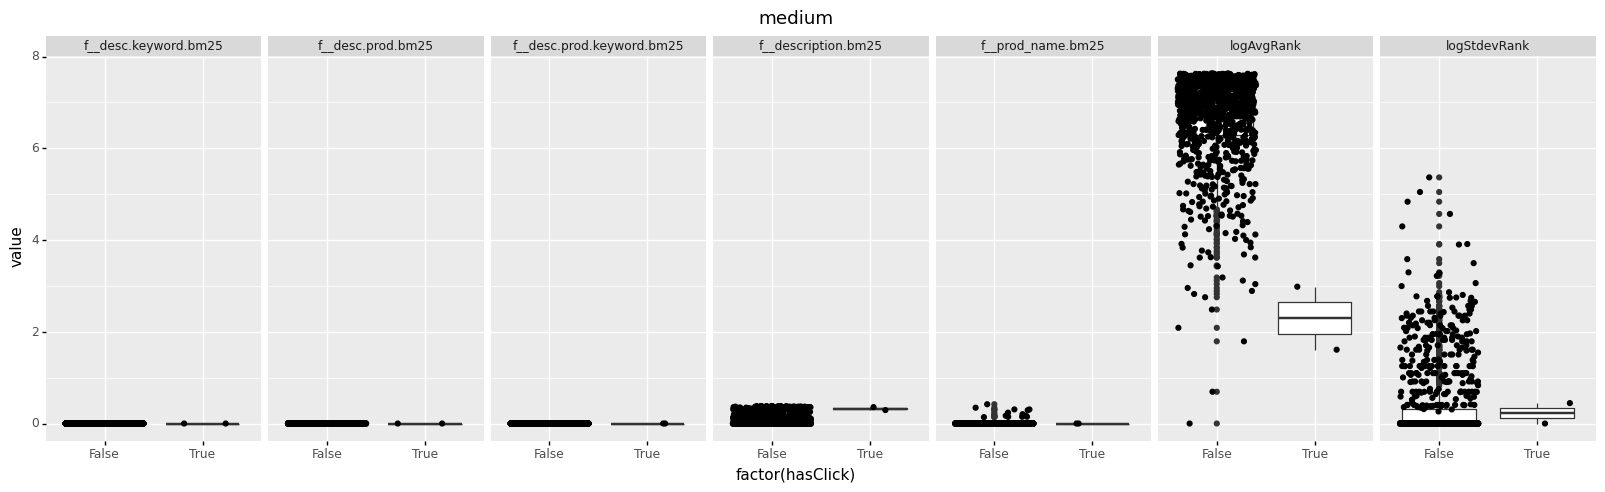

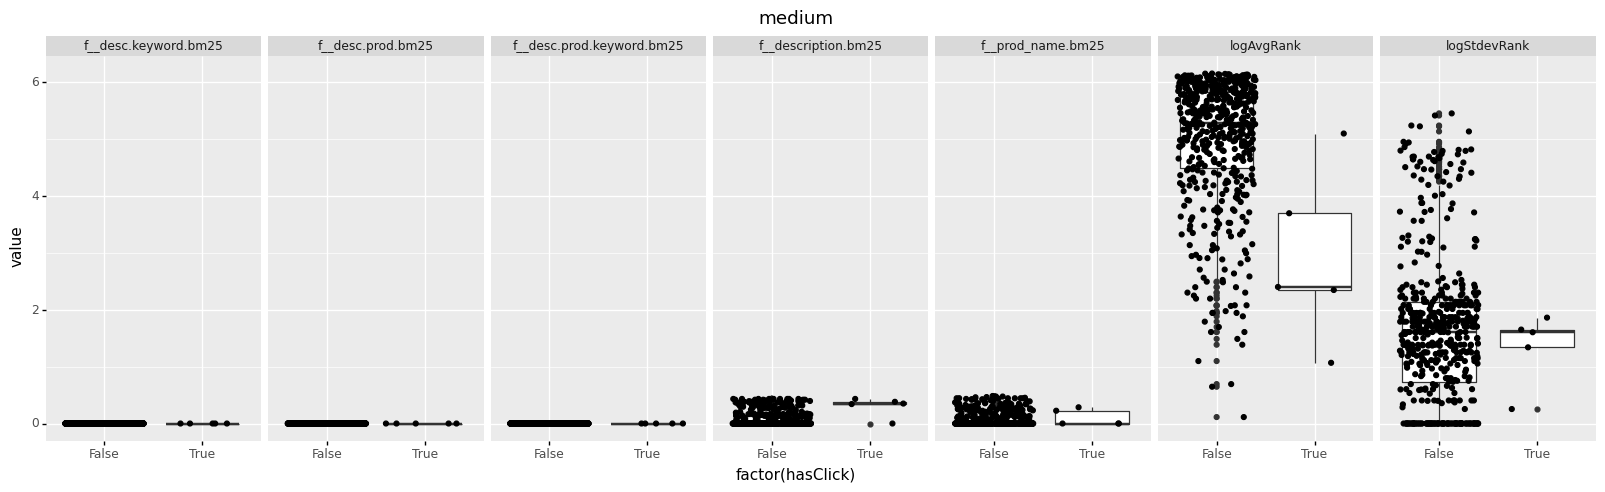

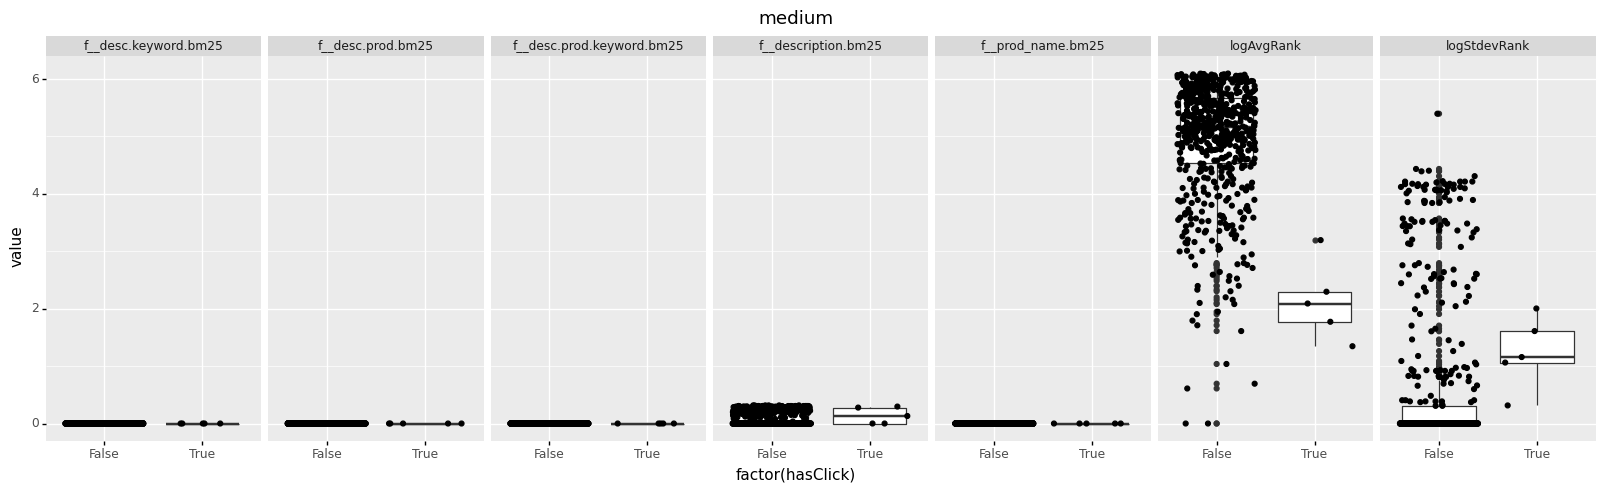

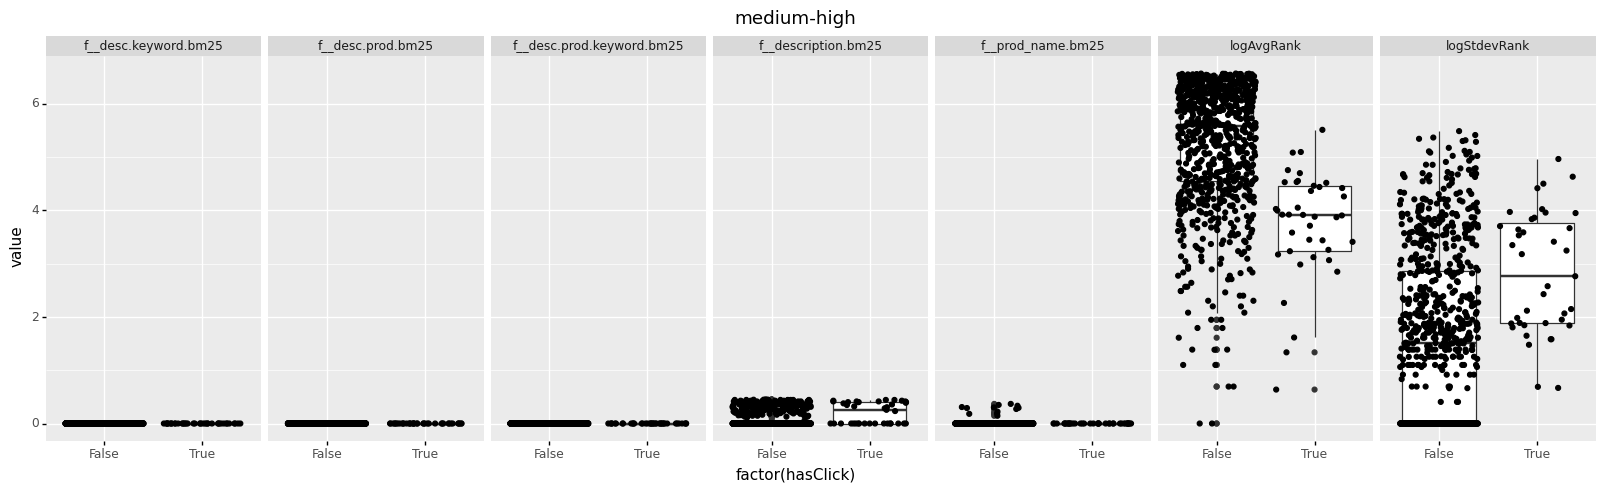

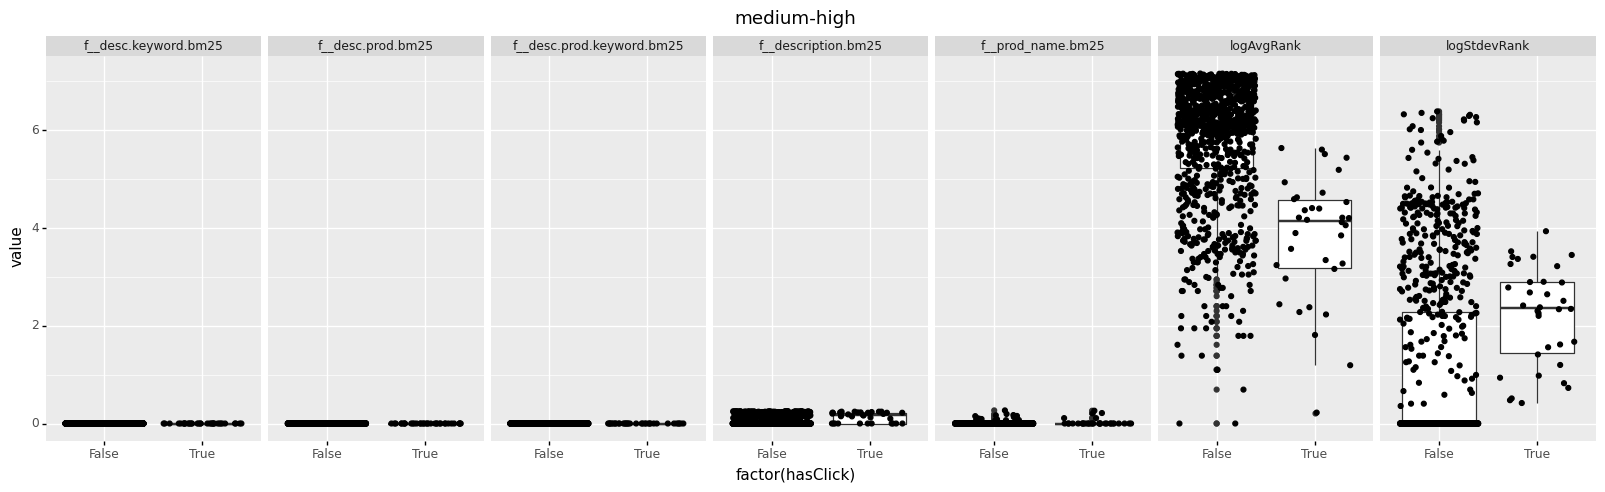

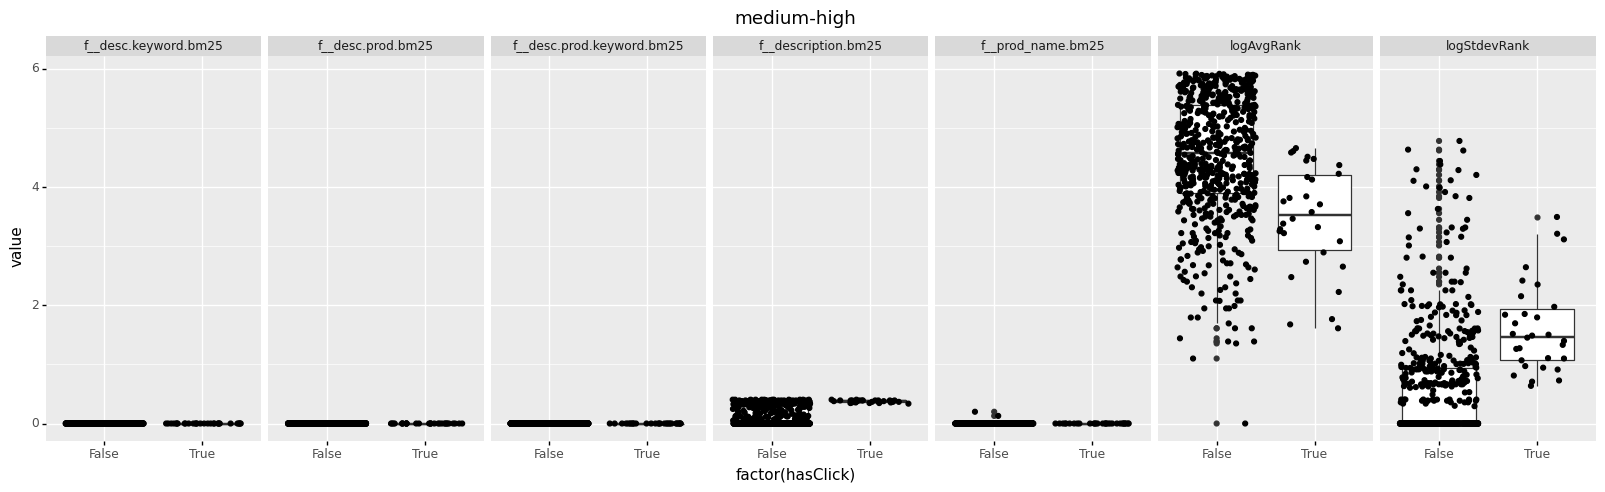

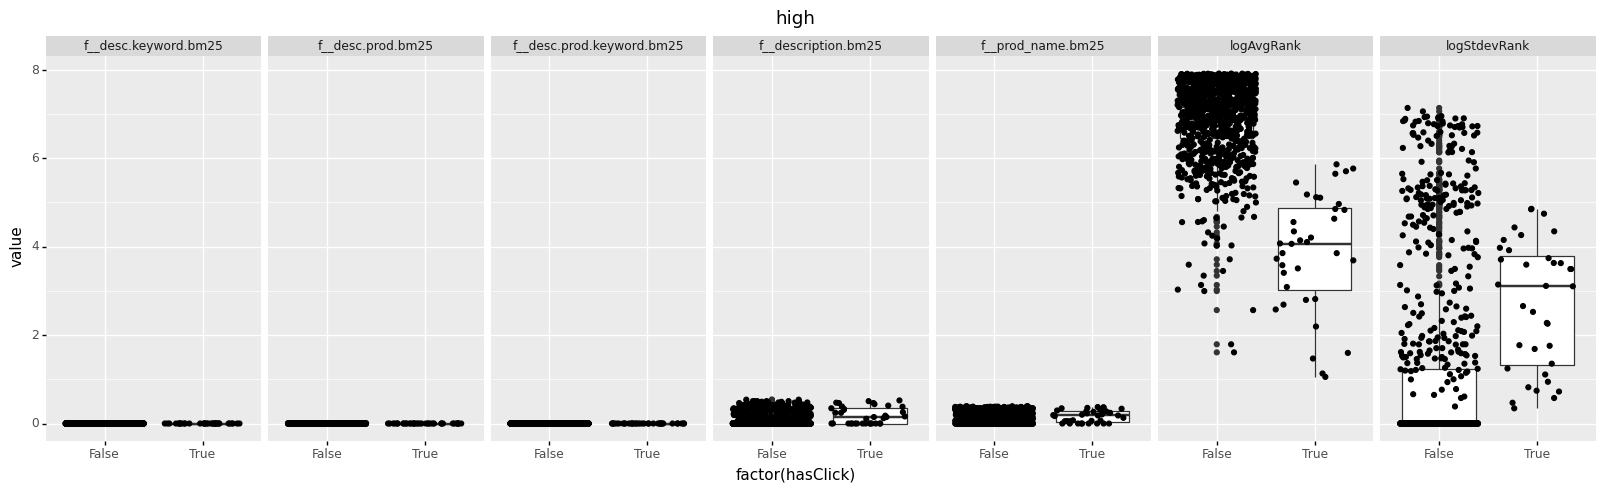

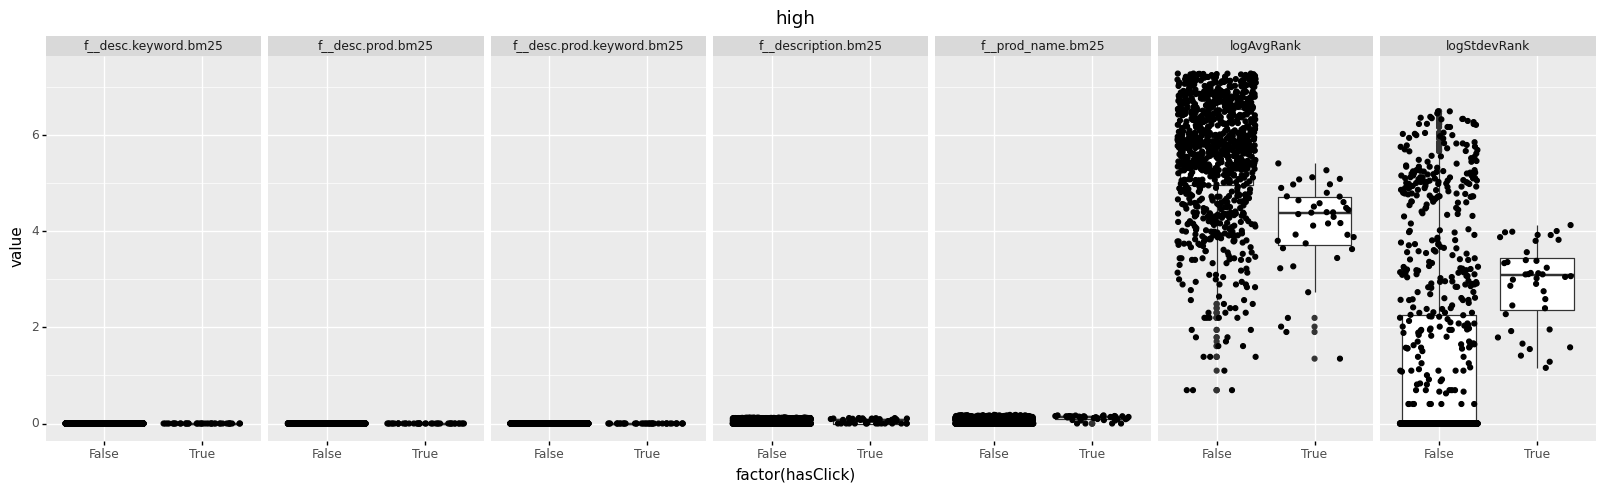

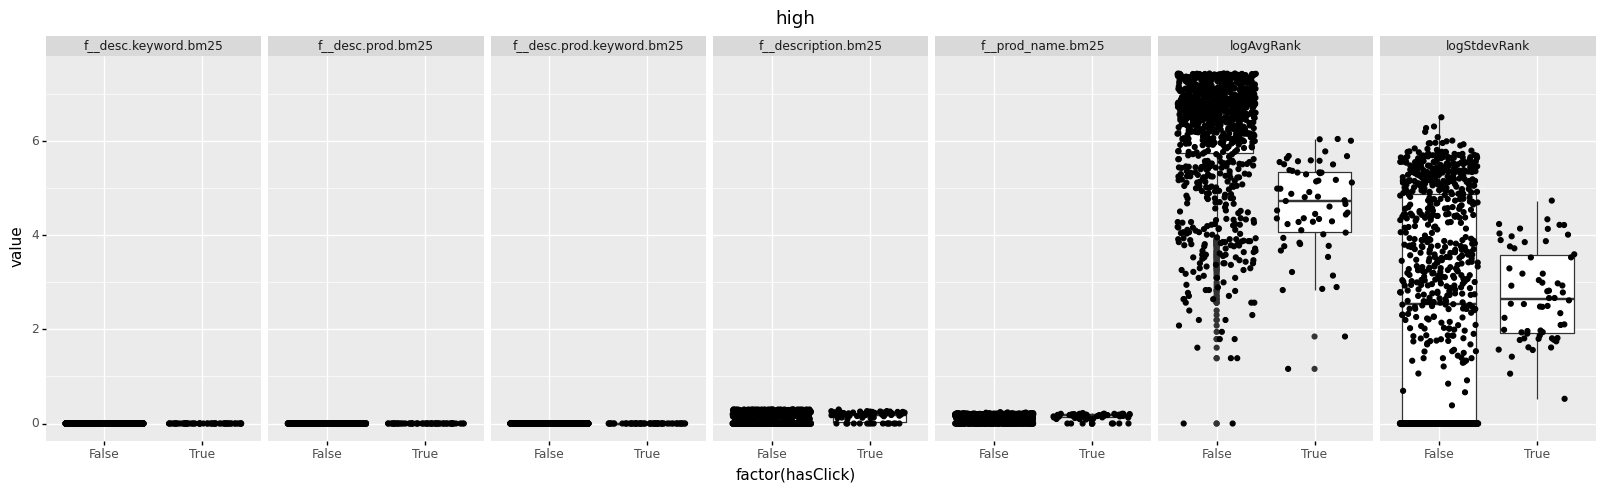

In [48]:
labels = ['low', 'low-medium', 'medium', 'medium-high', 'high']
bins = [0, 10, 50, 100, 1000, 9000]
df["qcCut"] = pd.cut(df["qc"], bins=bins, labels=labels)
import math
df["logAvgRank"] = df["avgRank"].apply(lambda x: math.log(x+1))
df["logStdevRank"] = df["stdevRank"].apply(lambda x: math.log(x+1))
# df[["qc", "qcCut"]]
# df[df.qcCut == "low"]["qc"].unique()

for label in labels:
    cnt = 0
    for i, (query, gdf) in enumerate(df[df.qcCut == label].groupby(["search_keyword"])):
        if cnt == 3: break
        if len(gdf["hasClick"].unique()) == 1: continue
        # if len(gdf["f__desc.prod.bm25"].unique()) == 1: continue
        # print(gdf["f__desc.prod.bm25"].unique())

        # TODO: melt text type fields
        # TODO: + facet_grid(". ~ carat_c")
        gdf_reshape = pd.melt(
            frame=gdf,
            id_vars=["hasClick"],
            # value_vars=[x for x in gdf.columns if x.endswith(".bm25")],
            # value_vars=["f__description.bm25", "f__prod_name.bm25", "f__desc.prod.bm25", "f__desc.keyword.bm25", "f__desc.prod.keyword.bm25"],
            value_vars=["logAvgRank", "logStdevRank", "f__description.bm25", "f__prod_name.bm25", "f__desc.prod.bm25", "f__desc.keyword.bm25", "f__desc.prod.keyword.bm25"],
            # var_name=
            # value_nami=
        )
        # print(gdf_reshape.head())

        # draw plot
        (
            ggplot(gdf_reshape, aes("factor(hasClick)", "value"))
            + geom_boxplot()
            + geom_jitter()
            # + labs(title=query)
            # + geom_point()
            # + theme(text=element_text(fontproperties=font))
            + ggtitle(label)
            + theme(figure_size=(20, 5))
            + facet_grid(".~variable")
        ).draw()

        cnt += 1

## Facet 3. 질의 길이

In [11]:
from services import card_dev

def get_query_length(q):
    res = card_dev.get_analyze_result(query=q, analyzers=["korean"])
    tokens = res["korean"]["tokens"]
    return sum(1 for tok in tokens if tok["type"] == "word")

df["queryLength"] = df["search_keyword"].apply(get_query_length)
df[["search_keyword", "queryLength"]]

TransportError: TransportError(500, 'node_not_connected_exception', '[search-es2-master-0][10.0.104.25:9300] Node not connected')

In [ ]:
pd.qcut(df["queryLength"], q=5).value_counts()

In [1]:
# (
#    ggplot(df[df["f__description.bm25"] > 0.0], aes("f__description.bm25"))
#    + geom_histogram()
#    # + labs(title=title)
# ).draw()

## Adjust CTR

In [56]:
# from click_models import CTRHelper
import statistics as stats

class CTRHelper:

    def __init__(self, df, impression_column, click_column) -> None:
        self.df = df
        self.impression_column = impression_column
        self.click_column = click_column
    
    def _calc_ctr_raw(self):
        self.df = self.df.copy()
        self.df["ctr_raw"] = self.df[self.click_column] / self.df[self.impression_column]

    def _calc_mean_and_var(self, df):
        self.mean_ctr = stats.mean(df["ctr_raw"])
        self.var_ctr = stats.variance(df["ctr_raw"])
        self.stdev_ctr = stats.stdev(df["ctr_raw"])

    def _seperate_dataframe_by_click(self):
        # seperate dataframe with click(> 0) and nonclick
        click_df = self.df[self.df[self.click_column] > 0]
        nonclick_df = self.df[self.df[self.click_column] == 0]
        return click_df, nonclick_df

    def regularize(self):
        self._calc_ctr_raw()
        click_df, nonclick_df = self._seperate_dataframe_by_click()
        # NOTE: zero click인 문서는 0.0으로 변경하고 정규화에 참여하지 않도록 한다.
        self._calc_mean_and_var(click_df)
        click_df, nonclick_df = self.by_beta_distribution(click_df, nonclick_df)
        click_df, nonclick_df = self.by_gaussian_distribution(click_df, nonclick_df)
        # concat (by index) and reorder
        df = pd.concat([click_df, nonclick_df], axis=0).sort_values(["search_keyword"])
        # df = self.by_modify_factor(df, name="mctr")
        # df = self.by_modify_factor(df, name="mctr2", denom_factor=50, num_factor=1)
        df = self.by_modify_factor(df, name="mctr", denom_factor=20, num_factor=1)
        # df = self.by_modify_factor(df, name="mctr4", denom_factor=10, num_factor=1)
        df["mctr"] = df.apply(lambda row: self._lower_weight(row, column="mctr"), axis=1)
        return df

    # 너무 낮은 imp는 가중치를 낮추기
    def _lower_weight(self, row, column, max_small_imp=10, weight=0.8):
        if row["impressions"] < max_small_imp:
            return row[column] * weight
        return row[column]

    def by_modify_factor(self, df, denom_factor=99, num_factor=1, name="mctr"):
        df = df.copy()
        df[name] = (df[self.click_column] + num_factor) / (df[self.impression_column] + denom_factor)
        return df
            
    def by_beta_distribution(self, click_df, nonclick_df):
        """ estimate alpha, beta parameter by using sample distribution
        https://stats.stackexchange.com/a/12239 

        assume sample data distribution can be explained by beta distribution
        TODO: fit test: https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test
        """
        # calculate sum(alpha, beta)
        alpha_beta = (self.mean_ctr * (1 - self.mean_ctr) / self.var_ctr) - 1
        # calculate alpha
        alpha = self.mean_ctr * alpha_beta
        # calculate beta
        beta = (1 - self.mean_ctr) * alpha_beta
        # calulate expected CTR
        expected_ctr_beta = alpha / (alpha + beta)
        # adjust ctr
        # TODO: 여긴 잘 이해가 안됨
        # TODO: alpha, beta가 일종의 조정 factor로 쓰이는 것 같은데, 둘다 형상모수에 해당함
        click_df = click_df.copy()
        nonclick_df = nonclick_df.copy()
        click_df["ctr_beta"] = (alpha + click_df[self.click_column]) / (alpha + beta + click_df[self.impression_column])
        nonclick_df["ctr_beta"] = [0.0] * len(nonclick_df)
        # for access
        self.alpha = alpha
        self.beta = beta
        self.alpha_beta = alpha_beta
        self.expected_ctr_beta = expected_ctr_beta
        return click_df, nonclick_df

    def by_gaussian_distribution(self, click_df, nonclick_df):
        click_df = click_df.copy()
        nonclick_df = nonclick_df.copy()
        click_df["ctr_gaussian"] = (click_df["ctr_raw"] - self.mean_ctr) / self.stdev_ctr
        nonclick_df["ctr_gaussian"] = (nonclick_df["ctr_raw"] - self.mean_ctr) / self.stdev_ctr
        return click_df, nonclick_df

def calculate_percentiles(df, column, percentiles, exclude_zero=False):
    if exclude_zero:
        df = df[df["clicks"] > 0]
    percentile_values = []
    for p in percentiles:
        percentile_values.append(df[column].quantile(p))
    return percentile_values

def calculate_mean(df, column, exclude_zero=False):
    if exclude_zero:
        df = df[df["clicks"] > 0]
    return df[column].mean()


## TODO: 질의별로 기존 CTR과 uCTR의 차이를 통해 CTR이 왜곡될 수 있음을 보이기

In [57]:
# regularize CTR globally
# ctr_helper = CTRHelper(df=df, impression_column="impressions", click_column="clicks")
# NOTE: impressions가 너무 왜곡이 많이 되어 있다. (뒤로가기, 새로고침 등) 특히 클릭이 발생한 주변 문서들에 대해서도!
ctr_helper = CTRHelper(df=df, impression_column="uimpressions", click_column="uclicks")
df = ctr_helper.regularize()
df

search_keyword     docid  avgRank  stdevRank  impressions  clicks  \
452904         #거실인테리어    690785   111.00       0.00            2       0   
453265         #거실인테리어  11955303   230.00       0.00            1       0   
453266         #거실인테리어  12931954    67.00       0.00            4       0   
453267         #거실인테리어  13550978    46.17       1.07            6       0   
453269         #거실인테리어  16190584   159.00       0.00            1       0   
...                ...       ...      ...        ...          ...     ...   
1036631             힙한    790865   413.00       0.00            1       0   
1036632             힙한      3403   317.00       0.00            1       0   
1036633             힙한  14985023   171.67       1.25            3       0   
1036605             힙한   9635804   362.00       0.00            1       0   
1036358             힙한  12469128   161.80       4.26            5       0   

         uimpressions  uclicks  scrapCnt  qc  ...  f__has_tag  f__is_project  \
452904              1        0         0  40  ...         1.0            1.0   
453265              1        0         0  40  ...         1.0            0.0   
453266              1        0         0  40  ...         1.0            1.0   
453267              6        0         0  40  ...         1.0            0.0   
453269              1        0         0  40  ...         0.0            0.0   
...               ...      ...       ...  ..  ...         ...            ...   
1036631             1        0         0  62  ...         0.0            0.0   
1036632             1        0         0  62  ...         0.0            0.0   
1036633             3        0         0  62  ...         1.0            0.0   
1036605             1        0         0  62  ...         0.0            0.0   
1036358             4        0         0  62  ...         1.0            1.0   

         hasClick       qcCut  logAvgRank  logStdevRank  ctr_raw  ctr_beta  \
452904      False  low-medium    4.718499      0.000000      0.0       0.0   
453265      False  low-medium    5.442418      0.000000      0.0       0.0   
453266      False  low-medium    4.219508      0.000000      0.0       0.0   
453267      False  low-medium    3.853758      0.727549      0.0       0.0   
453269      False  low-medium    5.075174      0.000000      0.0       0.0   
...           ...         ...         ...           ...      ...       ...   
1036631     False      medium    6.025866      0.000000      0.0       0.0   
1036632     False      medium    5.762051      0.000000      0.0       0.0   
1036633     False      medium    5.151382      0.810930      0.0       0.0   
1036605     False      medium    5.894403      0.000000      0.0       0.0   
1036358     False      medium    5.092522      1.660131      0.0       0.0   

         ctr_gaussian      mctr  
452904      -0.949615  0.038095  
453265      -0.949615  0.038095  
453266      -0.949615  0.038095  
453267      -0.949615  0.030769  
453269      -0.949615  0.038095  
...               ...       ...  
1036631     -0.949615  0.038095  
1036632     -0.949615  0.038095  
1036633     -0.949615  0.034783  
1036605     -0.949615  0.038095  
1036358     -0.949615  0.033333  

[1278089 rows x 57 columns]

In [43]:
df.describe()

docid       avgRank     stdevRank   impressions        clicks  \
count  3.957543e+06  3.957543e+06  3.957543e+06  3.957543e+06  3.957543e+06   
mean   9.688850e+06  2.608981e+02  1.983197e+01  1.005049e+01  2.925477e-01   
std    4.675018e+06  2.972987e+02  6.539501e+01  3.652430e+01  1.598125e+00   
min    7.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.231097e+06  7.600000e+01  0.000000e+00  1.000000e+00  0.000000e+00   
50%    1.072542e+07  1.738600e+02  1.750000e+00  3.000000e+00  0.000000e+00   
75%    1.346768e+07  3.420000e+02  1.000000e+01  8.000000e+00  0.000000e+00   
max    1.666670e+07  7.778000e+03  3.784000e+03  9.728000e+03  5.120000e+02   

       uimpressions       uclicks      scrapCnt            qc            cc  \
count  3.957543e+06  3.957543e+06  3.957543e+06  3.957543e+06  3.957543e+06   
mean   6.830667e+00  2.744028e-01  1.163095e-03  4.769992e+02  3.320817e+02   
std    2.321796e+01  1.462650e+00  3.701288e-02  1.436011e+03  9.917556e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  7.000000e+00  5.000000e+00   
25%    1.000000e+00  0.000000e+00  0.000000e+00  6.500000e+01  4.400000e+01   
50%    2.000000e+00  0.000000e+00  0.000000e+00  1.380000e+02  9.800000e+01   
75%    6.000000e+00  0.000000e+00  0.000000e+00  3.640000e+02  2.560000e+02   
max    4.964000e+03  4.680000e+02  1.100000e+01  3.764000e+04  2.699200e+04   

       ...  f__is_project  f__desc.prod.keyword       ctr_raw      ctr_beta  \
count  ...   3.957543e+06          3.957543e+06  3.957535e+06  3.957543e+06   
mean   ...   3.234504e-01          1.327782e+00  3.167064e-02  2.608337e-02   
std    ...   4.677930e-01          2.209808e+00  1.236129e-01  8.304155e-02   
min    ...   0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...   0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...   0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...   1.000000e+00          2.768319e+00  0.000000e+00  0.000000e+00   
max    ...   1.000000e+00          2.454567e+01  2.000000e+00  8.844547e-01   

       ctr_gaussian          mctr         mctr2         mctr3         mctr4  \
count  3.957535e+06  3.957543e+06  3.957543e+06  3.957543e+06  3.957543e+06   
mean  -7.701258e-01  1.156456e-02  2.159549e-02  4.785285e-02  8.351425e-02   
std    4.838673e-01  6.095262e-03  9.323861e-03  1.651194e-02  2.767285e-02   
min   -8.940965e-01  1.385042e-03  1.485884e-03  1.555210e-03  1.579779e-03   
25%   -8.940965e-01  9.708738e-03  1.851852e-02  4.166667e-02  7.142857e-02   
50%   -8.940965e-01  1.000000e-02  1.960784e-02  4.545455e-02  8.333333e-02   
75%   -8.940965e-01  1.000000e-02  1.960784e-02  4.761905e-02  9.090909e-02   
max    6.934652e+00  2.727273e-01  3.545455e-01  4.875000e-01  5.571429e-01   

        mctr3.lower  
count  3.957543e+06  
mean   4.036741e-02  
std    1.604753e-02  
min    1.555210e-03  
25%    3.478261e-02  
50%    3.809524e-02  
75%    3.809524e-02  
max    4.875000e-01  

[8 rows x 43 columns]

In [59]:
# get samples
sample_size = 10
sample_df = pd.concat([
    df[(df["clicks"] ==  0)].sample(sample_size),
    df[(df["clicks"] >= 1) & (df["clicks"] < 10)].sample(sample_size),
    df[(df["clicks"] >= 10) & (df["clicks"] < 20)].sample(sample_size),
    df[(df["clicks"] >= 20) & (df["clicks"] < 30)].sample(sample_size),
    df[(df["clicks"] >= 30) & (df["clicks"] < 40)].sample(sample_size),
    df[(df["clicks"] >= 40) & (df["clicks"] < 50)].sample(sample_size),
    df[(df["clicks"] >= 50)].sample(sample_size),
])
sample_df

search_keyword     docid  avgRank  stdevRank  impressions  clicks  \
72497         화장실 리모델링  14059162   146.25       4.32            4       0   
662321           베란다매트  12221879   206.50       3.57            4       0   
1190391           편백나무  10504564    10.10       0.30           10       0   
1200317             쿠션   9778882    11.00       0.00            1       0   
867599            벙커침대   4560302    51.00       0.00            1       0   
...                ...       ...      ...        ...          ...     ...   
752894             선풍기  10847874     1.00       0.00          530      52   
1086327            아기방  10941171    15.43      13.19          432      51   
950842            드레스룸  12683304    11.58       2.56          741      71   
176298              의자  10320051     5.42      16.34         1192      50   
557904              책상  12822496     7.66      20.47         1685      66   

         uimpressions  uclicks  scrapCnt    qc  ...  f__has_tag  \
72497               3        0         0   108  ...         1.0   
662321              3        0         0   154  ...         1.0   
1190391             8        0         0    29  ...         1.0   
1200317             1        0         0   652  ...         1.0   
867599              1        0         0  2464  ...         0.0   
...               ...      ...       ...   ...  ...         ...   
752894            347       43         0  1102  ...         1.0   
1086327           206       49         0  2098  ...         1.0   
950842            393       64         0  3537  ...         1.0   
176298            846       47         0  3016  ...         1.0   
557904           1085       59         0  5392  ...         1.0   

         f__is_project  hasClick        qcCut  logAvgRank  logStdevRank  \
72497              1.0     False  medium-high    4.992132      1.671473   
662321             0.0     False  medium-high    5.335131      1.519513   
1190391            0.0     False   low-medium    2.406945      0.262364   
1200317            0.0     False  medium-high    2.484907      0.000000   
867599             0.0     False         high    3.951244      0.000000   
...                ...       ...          ...         ...           ...   
752894             0.0      True         high    0.693147      0.000000   
1086327            0.0      True         high    2.799109      2.652537   
950842             0.0      True         high    2.532108      1.269761   
176298             0.0      True         high    1.859418      2.853016   
557904             1.0      True         high    2.158715      3.066657   

          ctr_raw  ctr_beta  ctr_gaussian      mctr  
72497    0.000000  0.000000     -0.949615  0.034783  
662321   0.000000  0.000000     -0.949615  0.034783  
1190391  0.000000  0.000000     -0.949615  0.035714  
1200317  0.000000  0.000000     -0.949615  0.038095  
867599   0.000000  0.000000     -0.949615  0.038095  
...           ...       ...           ...       ...  
752894   0.123919  0.124525     -0.509390  0.119891  
1086327  0.237864  0.238073     -0.104600  0.221239  
950842   0.162850  0.163240     -0.371089  0.157385  
176298   0.055556  0.055923     -0.752253  0.055427  
557904   0.054378  0.054666     -0.756437  0.054299  

[70 rows x 57 columns]

In [63]:
target = "mctr"
percentiles = calculate_percentiles(df, target, [0.95, 0.75, 0.5, 0.25])
print(percentiles)
percentiles = calculate_percentiles(df, target, [0.95, 0.75, 0.5, 0.25], exclude_zero=True)
print(percentiles)
# mean = calculate_mean(df, target)
# print(mean)
# mean = calculate_mean(df, target, exclude_zero=True)
# print(mean)

print("----")
target = "f__description.bm25"
percentiles = calculate_percentiles(df, target, [0.95, 0.75, 0.5, 0.4, 0.3, 0.2, 0.1], exclude_zero=True)
print(percentiles)

[0.07272727272727274, 0.0380952380952381, 0.0380952380952381, 0.034782608695652174]
[0.11538461538461539, 0.0761904761904762, 0.06956521739130435, 0.06153846153846154]
----
[0.5188110099999999, 0.31803307, 0.16431397, 0.0, 0.0, 0.0, 0.0]


* imp가 높을수록 상위질의일 가능성이 높으며 사용자들이 많이 찾는 질의이며 피드백이 좀 더 많을 수 있어서 신뢰성이 증가한다.
  * 따라서 imp가 높으면 같은 클릭비율이어도 약간의 가중치를 주고 싶다.
* imp가 매우작고, 클릭이 한두번 정도이면 신뢰하기가 어렵다. 따라서 가중치를 낮추고 싶다.

이에 부합하는 ctr 분포는?

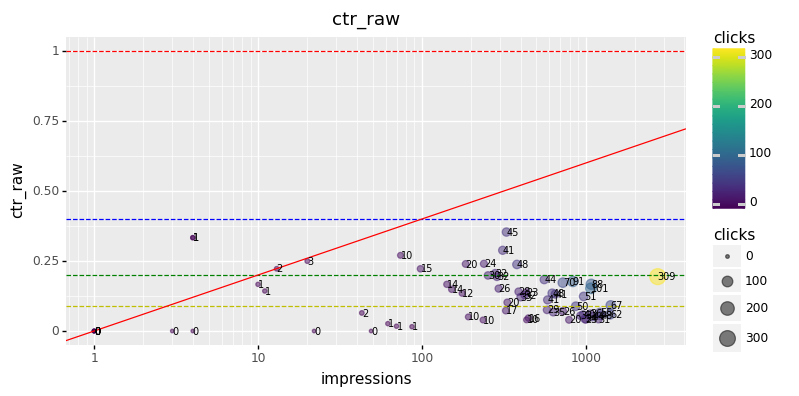

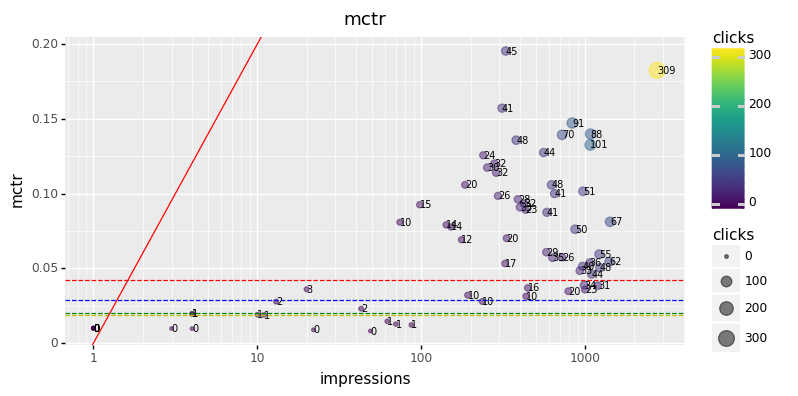

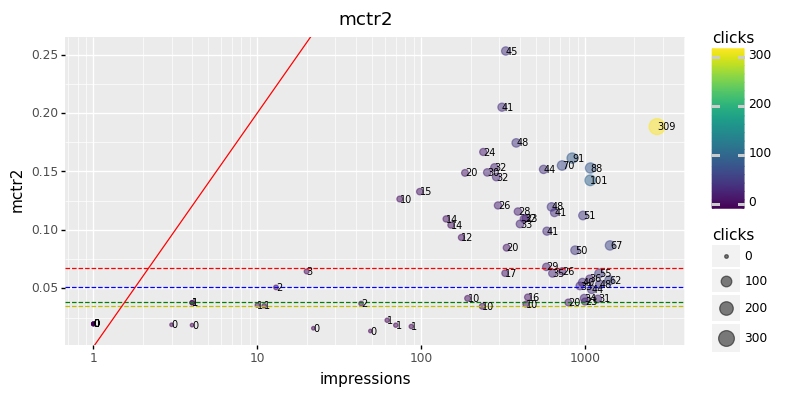

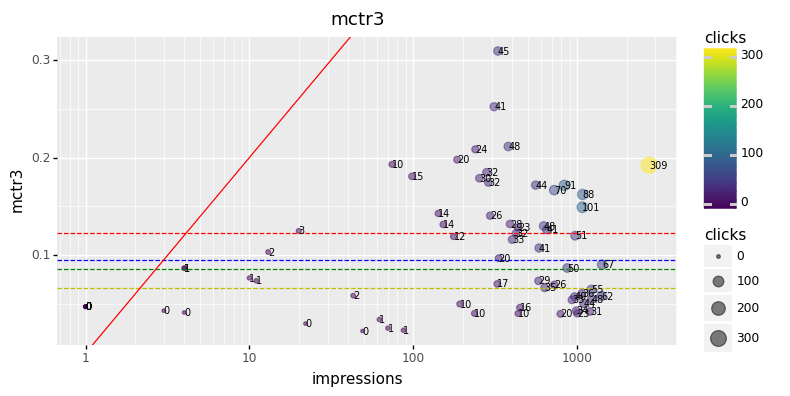

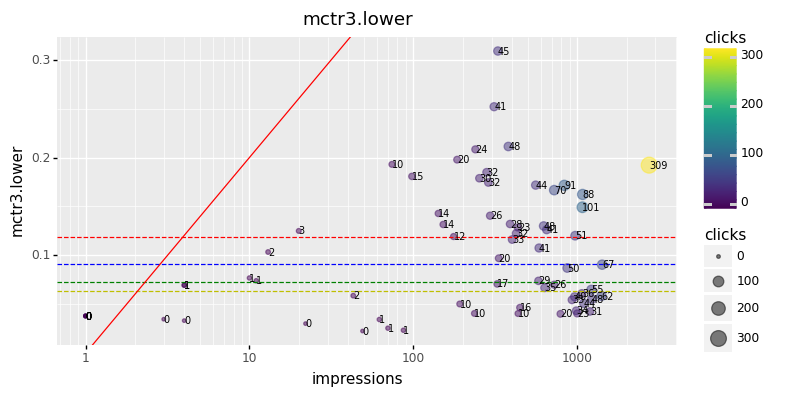

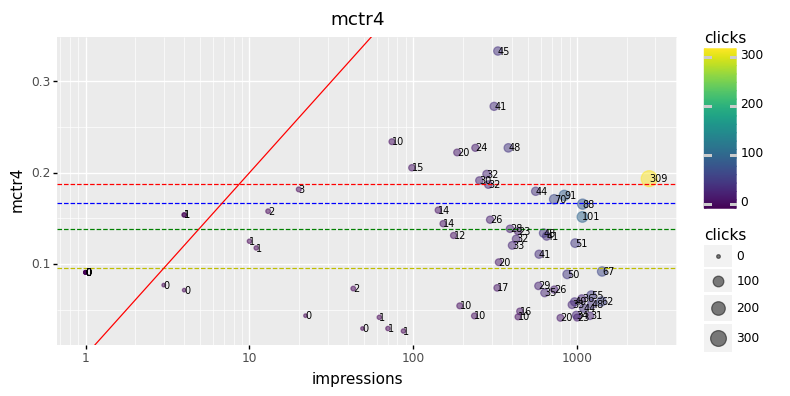

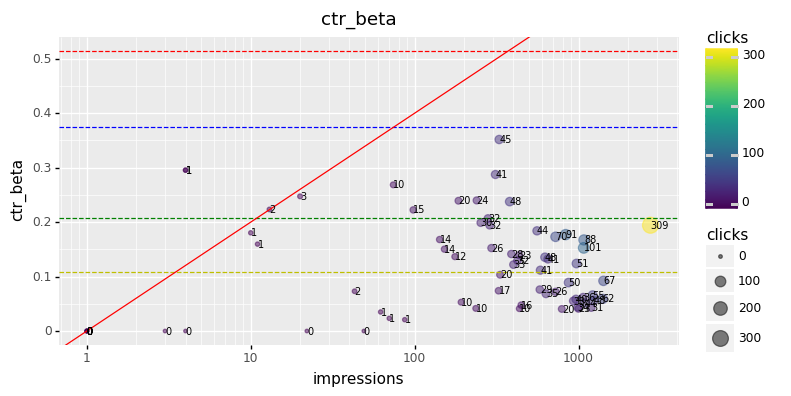

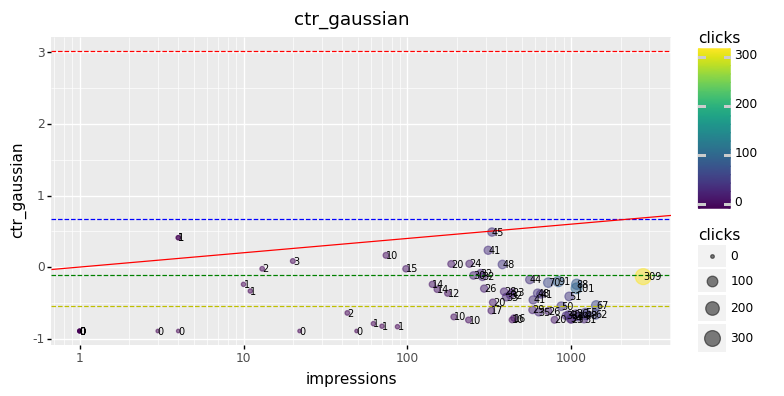

In [46]:
# 너무 낮은 imp는 가중치를 낮추기
def _lower_weight(row, column, max_small_imp=10, weight=0.8):
    if row["impressions"] < max_small_imp:
        return row[column] * weight
    return row[column]

# sample_df["mctr3.lower"] = sample_df.apply(lambda row: _lower_weight(row, column="mctr3"), axis=1)

for target in ["ctr_raw", "mctr", "mctr2", "mctr3", "mctr3.lower", "mctr4", "ctr_beta", "ctr_gaussian"]:
    percentiles = calculate_percentiles(df, target, [0.95, 0.85, 0.65, 0.35], exclude_zero=True)
    # percentiles = calculate_percentiles(df, target.replace(".lower", ""), [0.95, 0.75, 0.5, 0.25], exclude_zero=True)
    # percentiles = calculate_percentiles(df, target.replace(".lower", ""), [0.95, 0.85, 0.75, 0.25], exclude_zero=True)
    (
        ggplot(sample_df, aes('impressions', target, color="clicks", size="clicks"))
        + geom_point(alpha = .5)
        # + geom_abline(intercept=0, slope=1, color="red")
        + geom_hline(yintercept=percentiles[0], linetype="dashed", color="r")
        + geom_hline(yintercept=percentiles[1], linetype="dashed", color="b")
        + geom_hline(yintercept=percentiles[2], linetype="dashed", color="g")
        + geom_hline(yintercept=percentiles[3], linetype="dashed", color="y")
        + geom_abline(intercept=0, slope=2/10, color="red")
        + geom_text(sample_df, aes("impressions", target, label="clicks"), size=7, ha="left", color="black")
        + scale_x_log10()
        # + scale_y_log10()
        + theme(figure_size=(8,4))
        + labs(title=target)
    ).draw()

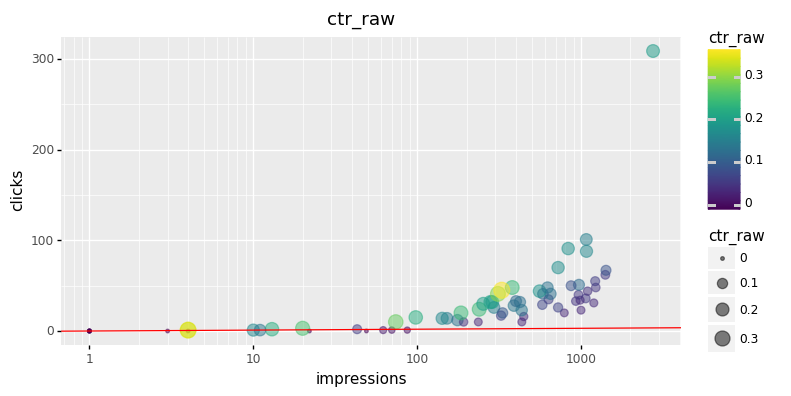

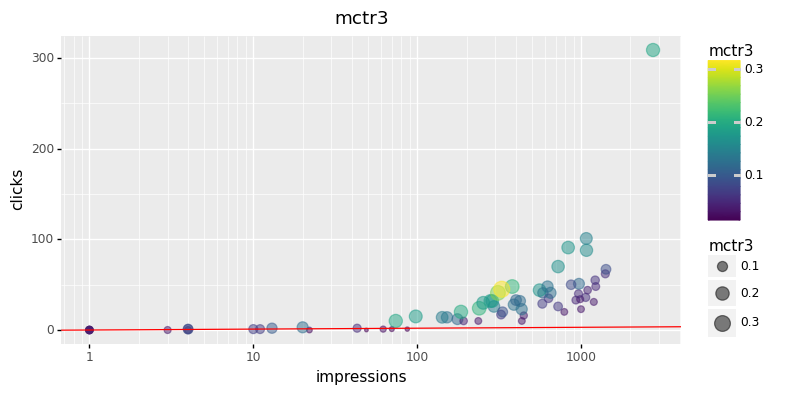

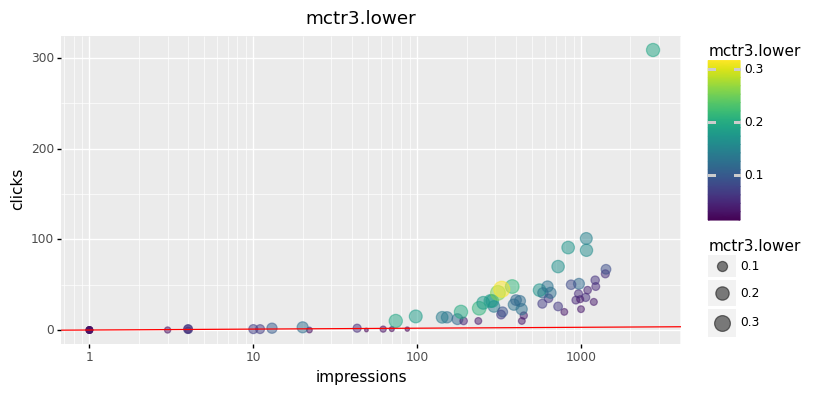

In [47]:
# for target in ["ctr_raw", "mctr", "mctr2", "ctr_beta"]:
for target in ["ctr_raw", "mctr3", "mctr3.lower"]:
    (
        ggplot(sample_df, aes('impressions', 'clicks', color=target, size=target))
        # + geom_vline(xintercept = ctr_helper.expected_ctr_beta, linetype='dashed', color="red")
        + geom_point(alpha = .5)
        + geom_abline(intercept=0, slope=1, color="red")
        # + geom_hline(yintercept=25, linetype="dashed", color="blue")
        # + geom_hline(yintercept=50, linetype="dashed", color="blue")
        # + geom_hline(yintercept=75, linetype="dashed", color="blue")
        + scale_x_log10()
        + theme(figure_size=(8, 4))
        + labs(title=target)
    ).draw()

## Relevant Score
https://www.microsoft.com/en-us/research/project/mslr/

* 4점: perfectly relevant
* 3점:
* 2점:
* 1점:
* 0점: irrelevant

In [48]:
# percentiles = calculate_percentiles(df, "mctr3", [0.95, 0.75, 0.5, 0.25], exclude_zero=True)
percentiles = calculate_percentiles(df, "mctr3.lower", [0.95, 0.85, 0.65, 0.35], exclude_zero=True)

def get_grade(ctr, percentiles):
    #print(ctr, np.quantile(ctr_list, 0.95))
    if ctr >= percentiles[0]:
        return 4
    elif ctr >= percentiles[1]:
        return 3
    elif ctr >= percentiles[2]:
        return 2
    elif ctr >= percentiles[3]:
        return 1
    return 0

* 같은 제로클릭이어도, impression이 높은 경우 -> 더 저품질일 가능성
  * 예: uimp=1, uclick=0 vs. uimp=8, uclick=0

In [52]:
target = "ctr_beta"
target = "mctr"
target = "mctr3.lower"

new_df = None
for i, (query, group_df) in enumerate(df.groupby(["search_keyword"])):

    # NOTE: impression 1 이하는 제거
    group_df = group_df.copy()
    # group_df = group_df[group_df["uimpressions"] > 1]
    group_df = group_df[group_df["uimpressions"] > 3]

    if len(group_df) == 0:
        continue

    group_df["grade"] = group_df.apply(lambda row: get_grade(row[target], percentiles), axis=1)
    # group_df["ctrCutoff"] = ["/".join(f"{x:.1f}" for x in ctr_cutoff)] * len(group_df)
    group_df = group_df.sort_values(["grade"], ascending=False)

    # 하나의 등급만 가지고 있는 경우(예: 0만 가지고 있는 경우)
    if len(group_df["grade"].unique()) == 1:
        print(f"Pass Query: {query}")
        continue

    if new_df is None:
        new_df = group_df
    else:
        new_df = pd.concat([new_df, group_df])

# sampling: 각 점수별로 비율을 어느정도 맞춰서?
# new_df.insert(0, "ctrCutoff", new_df.pop("ctrCutoff"))
new_df.insert(0, target, new_df.pop(target))
new_df.insert(0, "grade", new_df.pop("grade"))
# temp = new_df[new_df["search_keyword"] == "#침실인테리어"]
new_df["grade"] = new_df["grade"].astype(str)
new_df

Pass Query: 까미나르
Pass Query: 라시드
Pass Query: 링어데이트
Pass Query: 아날로그소년
Pass Query: 일룸 로이모노


grade  mctr3.lower search_keyword     docid  avgRank  stdevRank  \
36          1     0.069565             러그   9094102    41.00      40.01   
775         1     0.069565             러그  15194406     4.00       7.35   
262         1     0.066667             러그  12868776    80.57      94.55   
596         1     0.069565             러그  10428870    13.00       3.42   
319         1     0.069565             러그  12910990    37.25      57.01   
...       ...          ...            ...       ...      ...        ...   
3957768     0     0.034483             힙합   3964436     7.96       0.95   
3957772     0     0.033333             힙합  11196389     2.89       0.45   
3957774     0     0.035714             힙합    797169    14.65       0.57   
3957777     0     0.035714             힙합   9184364    13.65       0.57   
3957778     0     0.035714             힙합   3964437     6.58       0.82   

         impressions  clicks  uimpressions  uclicks  ...  f__has_tag  \
36                 8       1             3        1  ...         1.0   
775                6       1             3        1  ...         1.0   
262                6       1             4        1  ...         1.0   
596                6       1             3        1  ...         1.0   
319                7       1             3        1  ...         1.0   
...              ...     ...           ...      ...  ...         ...   
3957768           23       0             9        0  ...         0.0   
3957772           19       0            10        0  ...         1.0   
3957774           20       0             8        0  ...         1.0   
3957777           20       0             8        0  ...         1.0   
3957778           19       0             8        0  ...         0.0   

         f__is_project  f__desc.prod.keyword   ctr_raw  ctr_beta  \
36                 0.0              2.226340  0.333333  0.295378   
775                0.0              2.658950  0.333333  0.295378   
262                0.0              2.981591  0.250000  0.243561   
596                0.0              2.829388  0.333333  0.295378   
319                1.0              2.639436  0.333333  0.295378   
...                ...                   ...       ...       ...   
3957768            0.0              6.802954  0.000000  0.000000   
3957772            0.0              8.165143  0.000000  0.000000   
3957774            1.0              2.266172  0.000000  0.000000   
3957777            0.0              3.653664  0.000000  0.000000   
3957778            0.0              6.802954  0.000000  0.000000   

         ctr_gaussian      mctr     mctr2     mctr3     mctr4  
36           0.410695  0.019608  0.037736  0.086957  0.153846  
775          0.410695  0.019608  0.037736  0.086957  0.153846  
262          0.084497  0.019417  0.037037  0.083333  0.142857  
596          0.410695  0.019608  0.037736  0.086957  0.153846  
319          0.410695  0.019608  0.037736  0.086957  0.153846  
...               ...       ...       ...       ...       ...  
3957768     -0.894097  0.009259  0.016949  0.034483  0.052632  
3957772     -0.894097  0.009174  0.016667  0.033333  0.050000  
3957774     -0.894097  0.009346  0.017241  0.035714  0.055556  
3957777     -0.894097  0.009346  0.017241  0.035714  0.055556  
3957778     -0.894097  0.009346  0.017241  0.035714  0.055556  

[2424253 rows x 45 columns]

### Grade별 평균분포 
MSLR 은 오히려 다양하다. 약간 실제랑 비슷하게 만드려는?
```
0 - 0.561775
1 - 0.292694
2 - 0.121764
3 - 0.016659
4 - 0.007108
```

In [54]:
grade_dist = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
}

new_df["grade"] = new_df["grade"].astype(str)

for query, gdf in new_df.groupby(["search_keyword"]):
    grade_0 = len(gdf[gdf["grade"] == '0'])
    grade_1 = len(gdf[gdf["grade"] == '1'])
    grade_2 = len(gdf[gdf["grade"] == '2'])
    grade_3 = len(gdf[gdf["grade"] == '3'])
    grade_4 = len(gdf[gdf["grade"] == '4'])
    num_row = len(gdf)
    grade_dist["0"].append(grade_0/num_row)
    grade_dist["1"].append(grade_1/num_row)
    grade_dist["2"].append(grade_2/num_row)
    grade_dist["3"].append(grade_3/num_row)
    grade_dist["4"].append(grade_4/num_row)

for k, v in grade_dist.items():
    print(k, f"{np.mean(v):.6f}")

0 0.838683
1 0.065743
2 0.048406
3 0.028705
4 0.018463


In [32]:
# len(new_df[new_df["impressions"] <= 1]) / len(new_df)
# 0.30216385240775484j

0.30216385240775484

In [55]:
new_df.to_csv(RANKING_DATA_PATH_CSV, index=False)

In [56]:
# to judgment file
import sys
sys.path.append("../../")
from ltr.judgments import judgments_from_dataframe
judgments, featuremap = judgments_from_dataframe(new_df, diversity=3)
len(judgments)

2415650

In [57]:
def dump_feature_map(featuremap, dump_path):
    with open(dump_path, "w+") as writer:
        for idx, feat in enumerate(featuremap):
            data = [
                idx,
                feat,
                "q",
            ]
            writer.write(" ".join(str(x) for x in data) + "\n")

from myelasticsearch.ltr_wrapper import LTRWrapper
myltr = LTRWrapper()
myltr.dump_ranking_data(judgments, dump_path=RANKING_DATA_PATH)
dump_feature_map(featuremap, FEATUREMAP_PATH)


dump judgments to ../../rdataset/card/20220427.card.click.ranking.base.1m.v3.features.grade.txt


In [16]:
print(len(new_df["search_keyword"].unique()))

3014


  grade             variable     value
0     4  f__description.bm25  0.000000
1     4  f__description.bm25  0.307035
2     4  f__description.bm25  0.403089
3     4  f__description.bm25  0.322400
4     4  f__description.bm25  0.000000
5     3  f__description.bm25  0.000000
6     3  f__description.bm25  0.379353
7     3  f__description.bm25  0.000000
8     3  f__description.bm25  0.444838
9     3  f__description.bm25  0.444838


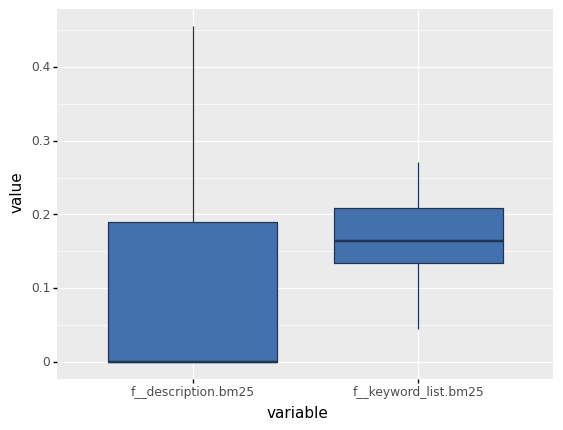

In [23]:
for query, group_df in new_df.groupby(["search_keyword"]):
    if len(group_df["grade"].unique()) < 5:
    # 질의별로 다양한 grade를 가진 것들만
        continue
    group_df["grade"] = group_df["grade"].astype(str)
    group_df_long = pd.melt(
        group_df[['grade', 'f__description.bm25', 'f__keyword_list.bm25']],
        id_vars=['grade'],
        value_vars=['f__description.bm25', 'f__keyword_list.bm25']
    )
    print(group_df_long.head(10))

    (
        ggplot(group_df_long, aes("variable", "value", color="grade"))
        + geom_boxplot(colour="#1F3552", fill="#4271AE")
        # + xlab("Diamond cut")
        # + ylab("Price of diamond (USD)")
        # + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
        #                      limits=[0, 20000])
        # + ggtitle("Price of diamonds by cut")
        # + theme(
        #     axis_line=element_line(size=1, colour="black"),
        #     panel_grid_major=element_line(colour="#d3d3d3"),
        #     panel_grid_minor=element_blank(),
        #     panel_border=element_blank(),
        #     panel_background=element_blank(),
        #     plot_title=element_text(size=15, family="Tahoma", 
        #                             face="bold"),
        #     text=element_text(family="Tahoma", size=11),
        #     axis_text_x=element_text(colour="black", size=8),
        #     axis_text_y=element_text(colour="black", size=10),
        # )
        # + facet_grid(". ~ carat_c")
    ).draw()
    break

## Visualization by Grade

In [41]:
# sampling (100개 질의)

def random_sampling(df, sample_size=100):
    def _filter_by_query(q, sample_query):
        if q in sample_query:
            return True
        return False
    query_list = df["search_keyword"].unique()
    random.shuffle(query_list)
    sample_query = query_list[:sample_size]
    df["temp"] = df.apply(lambda row: _filter_by_query(row["search_keyword", sample_query]), axis=1)
    sample_df = df.loc[df["temp"] == True, :]
    return sample_df

# sample_df = random_sampling(new_df)
# sample_df

df = new_df
# get samples
# sample_size = 10
# sample_df = pd.concat([
#     df[(df["grade"] ==  0)].sample(sample_size),
#     df[(df["grade"] ==  1)].sample(sample_size),
#     df[(df["grade"] ==  2)].sample(sample_size),
#     df[(df["grade"] ==  3)].sample(sample_size),
#     df[(df["grade"] ==  4)].sample(sample_size),
# ])
# sample_df

# 질의별로 다양한 grade를 가진 것들
# sample_df = []
# cnt = 0
# for query, group_df in df.groupby(["search_keyword"]):
#     if len(group_df["grade"].unique()) == 5:
#         cnt += 1
#     sample_df.append(group_df)
# print(f"Number of Diverse Queries: {cnt}")
# sample_df = pd.concat(sample_df)
# print(sample)
# sample_df
print(df["f__nickname.bm25"].unique())
print(df["f__company.bm25"].unique())

df.columns


[0.         0.2214423  0.48289034 0.33922753 0.38645118 0.22312109
 0.3138028  0.2921174  0.31180897 0.12975569 0.25469524 0.287034
 0.27412203 0.37616193 0.3338736  0.20253322 0.1020681  0.19433469
 0.31552586 0.22887328 0.44549492 0.21202463 0.26953965 0.35189867
 0.3724279  0.43866432 0.3698738  0.40809947 0.172567   0.34409592
 0.23808329 0.2040349  0.28066602 0.32464734 0.2646709  0.35539553
 0.18887173 0.46550247 0.3411502  0.18291692 0.14388566 0.45404935
 0.28553066 0.3088715  0.42384663 0.20023672 0.29930505 0.3922591
 0.40339702 0.13977209]
[0.         0.10314466 0.08321539 0.18638174 0.15036969 0.1856802 ]


Index(['grade', 'mctr3.lower', 'search_keyword', 'docid', 'avgRank',
       'stdevRank', 'impressions', 'clicks', 'uimpressions', 'uclicks',
       'scrapCnt', 'qc', 'cc', 'uqc', 'ucc', 'f__description.bm25',
       'f__keyword_list.bm25', 'f__nickname.bm25', 'f__company.bm25',
       'f__prod_name.bm25', 'f__prod_brand_name.bm25',
       'f__prod_categories.bm25', 'f__decode_style.bm25',
       'f__decode_area.bm25', 'f__decode_residence.bm25',
       'f__reinforcement.bm25', 'f__click_keywords.bm25', 'f__negatives.bm25',
       'f__reply_count', 'f__follower_count', 'f__praise_count',
       'f__scrap_count', 'f__view_count', 'f__user_card_count',
       'f__created_at_score', 'f__has_tag', 'f__is_project',
       'f__desc.prod.keyword', 'ctr_raw', 'ctr_beta', 'ctr_gaussian', 'mctr',
       'mctr2', 'mctr3', 'mctr4'],
      dtype='object')

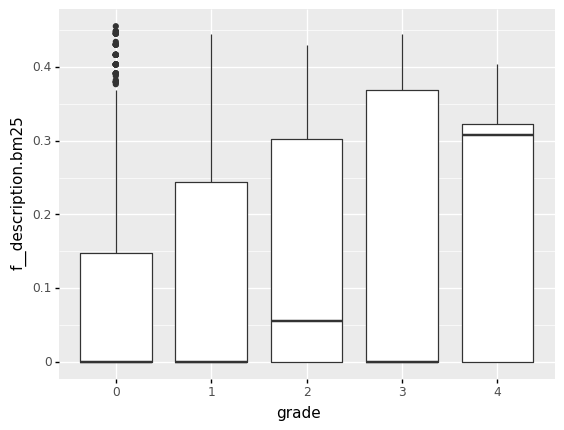

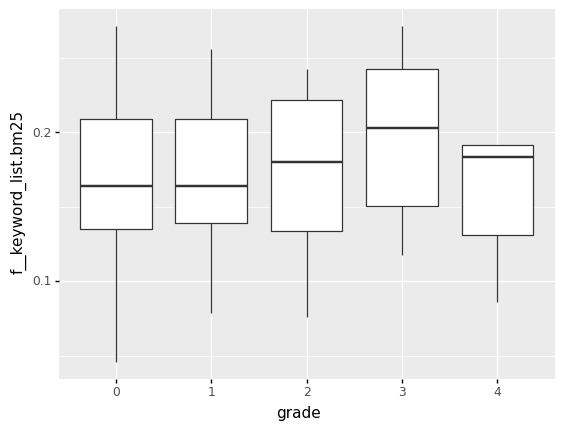

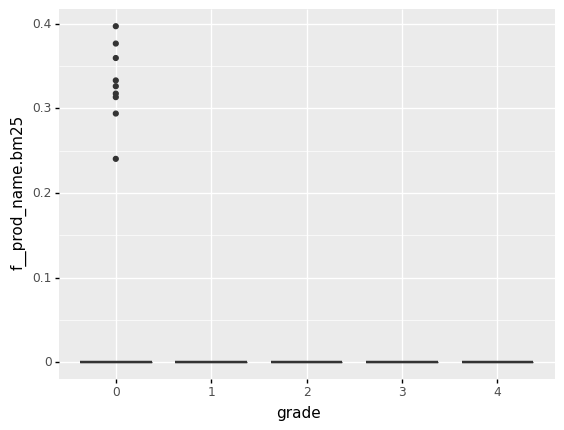

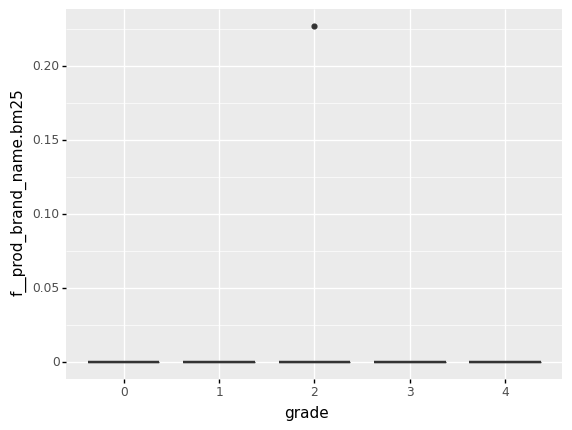

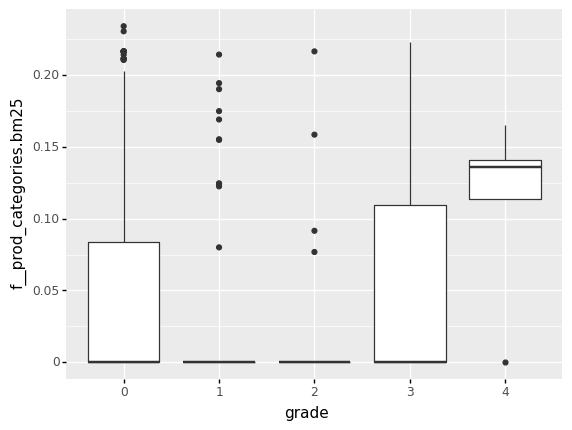

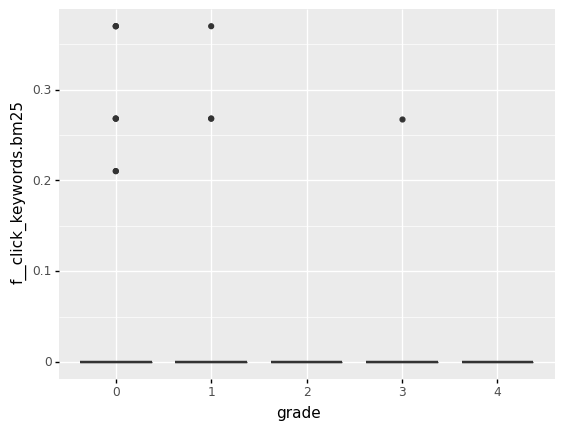

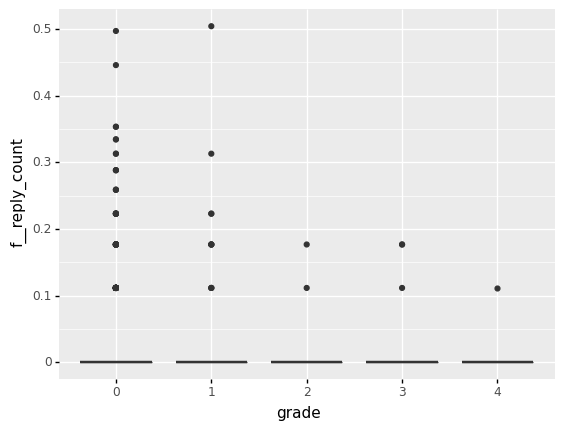

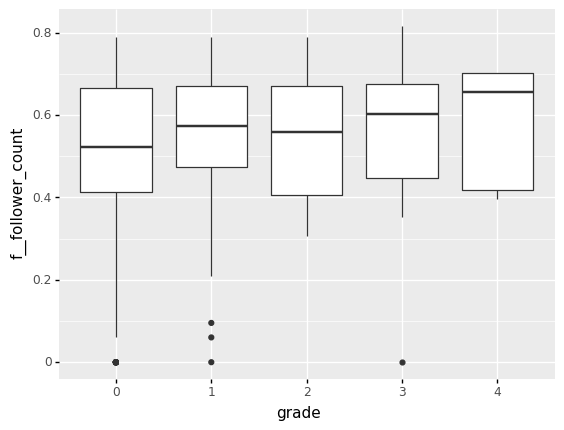

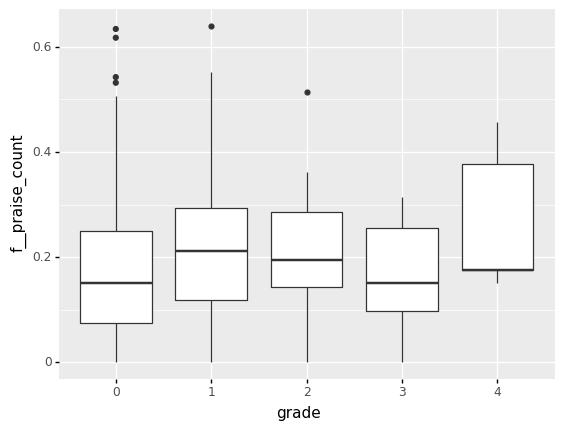

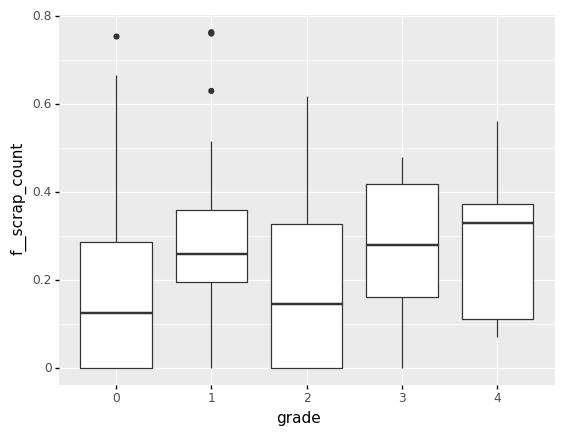

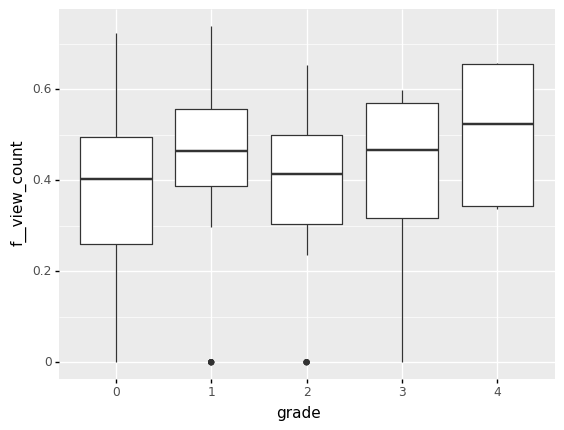

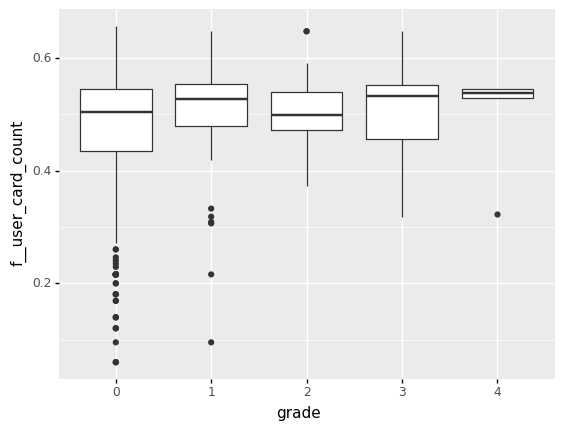

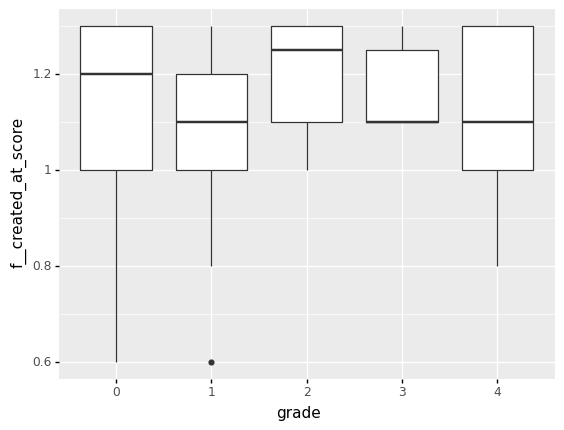

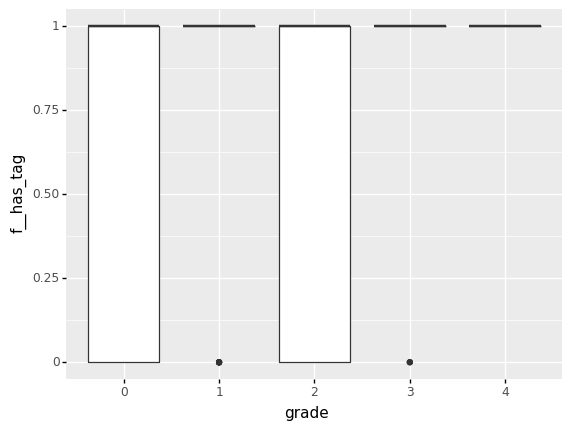

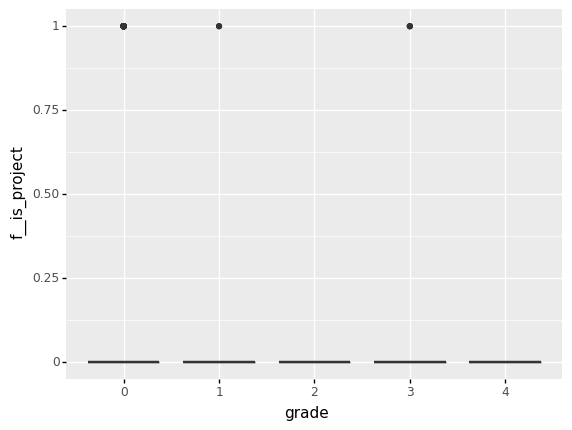

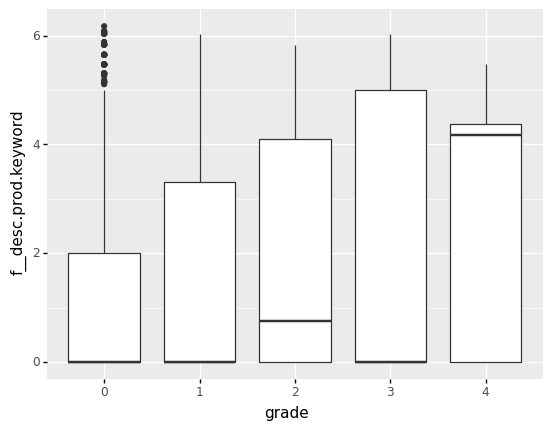

In [44]:
cnt = 0
for query, group_df in df.groupby(["search_keyword"]):
    if cnt == 1: break
    if len(group_df["grade"].unique()) < 5:
        # 질의별로 다양한 grade를 가진 것들만
        continue
    # type change
    group_df["grade"] = group_df["grade"].astype(str)

    for column in group_df.columns:
        if not column.startswith("f__"):
            continue
        feature_column = column
        if len(group_df[feature_column].unique()) == 1:
            # like no match
            continue
        (
            ggplot(group_df, aes("grade", feature_column)) 
            + geom_boxplot()
            + xlab("grade")
            + ylab(feature_column)
            # + scale_y_continuous(breaks=np.arange(0, 20001, 2500), limits=[0, 20000])
            # + labs(title=query)
        ).draw()

    cnt += 1

## Click Models

\text{SERP Clicks} = f(\text{query, document list, device, user preference, UI/UX, ...})

### mCTR 기반 분위수로 점수 부여해보기
- 평균 대비
- Window (4개) 단위로 mCTR 평균값 및 점수부여
- ...

In [51]:
uqc_mean = df["uqc"].mean()
uqc_50 = df["uqc"].quantile(0.5)
uqc_75 = df["uqc"].quantile(0.75)
uqc_95 = df["uqc"].quantile(0.95)
uqc_99 = df["uqc"].quantile(0.99)

cutoff = uqc_50
def dump_ranking_data():
    """ {grade, query, docid } """
    pass

dump_data = "./ranking/test.txt"
writer = open(dump_data, "w+")

top_k = 50 # FIXME
cnt = 0
queries = set()
for idx, row in df[df.uqc >= cutoff].iterrows():
    # if cnt == 50:
    #     break
    rank2docinfo = {rank:docinfo for rank, docinfo in row["rank2docinfo"].items() if int(rank) <= top_k}
    # ctr_list = [docinfo["ctr"] for rank, docinfo in rank2docinfo.items()]
    # ctr_list = [docinfo["cc"]/(docinfo["qc"]+5) for rank, docinfo in rank2docinfo.items()]
    ctr_list = [docinfo["ucc"]/(docinfo["uqc"]+5) for rank, docinfo in rank2docinfo.items()]

    for rank, docinfo in rank2docinfo.items():
        ctr = docinfo["ucc"]/(docinfo["uqc"]+5)
        relevance = get_relevance_score(ctr, ctr_list)

        if relevance not in (0, 2, 4):
            continue

        writer.write(json.dumps({
            "grade": relevance,
            "query": row["search_keyword"],
            "docid": docinfo["id"],
        }, ensure_ascii=False) + "\n")
        writer.flush()
        queries.add(row["search_keyword"])

    cnt += 1

print(f"Number of data: {len(queries)}")

writer.close()

KeyError: 'rank2docinfo'